In dieser Analyse möchte ich mich mit einem Datenset auseinandersetzen, welches Informationen über die spielbaren Charaktere ('Champions') in dem Videospiel 'League Of Legends' enthält.
Der verwendete Datensatz lässt sich hier finden: https://www.kaggle.com/datasets/laurenainsleyhaines/25-05-league-of-legends-champion-data-2025/data
Der Datensatz befand sich zum Zeitpunkt der Analyse auf dem Stand vom 14-03-25 und beinhaltet eine Vielzahl an Informationen zu den 170 zu dem Zeitpunkt des Datenstandes im Spiel vorhandenen Champions.



Der verwendete Datensatz enthält die folgenenden Informationen: 

- Die genauen Namen der Charaktere, inklusive internen API-Namen, gegebenenfalls vorhandenen Spitznamen und den Titeln, welche Champions zugewiesen sind

- Die Rollen und Positionen, die diese Charaktere im Spiel einnehmen

- Wann diese Charaktere dem Spiel hinzugefügt und wann sie das letzte Mal Ziel einer Veränderung wurden

- Die Kosten der jeweiligen Charaktere, um diese freizuschalten (in Blue Essence - der erspielbaren In-Game Währung - sowie Riot Points - der kaufbaren Premiumwährung)

- Eine Liste aller Statistiken, die die jeweiligen Charaktere im Spiel besitzen (Leben, Mana, etc.)

- Die Namen aller Fähigkeiten, die die jeweiligen Champions besitzen

- Offizielle Einteilungen der Spielentwickler von 6 verschiedenen Aspekten wie Schwierigkeit oder Schadenspotenzial, die die Charaktere innehaben

- Ob der jeweilige Charakter Nahkämpfer oder Fernkämpfer ist und ob dieser als Physischer oder Magischer Champion vorgesehen ist

- Eine 0-100 Skala, ob Champions ihren Schaden eher über Automatische Angriffe oder über das Verwenden von Fähigkeiten durchführen

- Was für eine Sekundäre Ressource Charaktere benutzen, um für das Verwenden von Fähigkeiten zu bezahlen


Für die Analyse möchte ich mich hierbei hauptsächlich auf die Entwicklung verschiedener Faktoren von Champions über die Jahre, in denen diese herausgebracht wurden, fokussieren. 
Ebenso ist von Interesse, wie die verschiedenen Attribute, die Charaktere innehaben, unter Umständen aufeinander einwirken.
Ein weiteres Augenmerk soll auch auf die Verteilung der Charaktereigenschaften über verschiedene Rollen bzw. Positionen geworfen werden, um Trends in diesen festzustellen.

Hierfür sind nicht alle der vorausgehend genannten Informationen notwendig und das Isolieren der notwendigen Spalten ist Teil der Bearbeitung, genauso wie die Validierung der Daten und das Überprüfen auf Komplettheit.


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
%matplotlib inline
from datetime import datetime
import string

In [5]:
df_raw = pd.read_csv("LoL_champion_data.csv")
df = df_raw.copy()

Alle notwendigen Libraries werden importiert, gefolgt vom CSV-File, das wir analysieren. Des Weiteren wird das originale CSV-File kopiert, damit wir mit dieser Kopie weiterarbeiten können und stets eine Backup-Version des originalen Datensatzes haben, sollte dieser notwendig sein.

In [7]:
df

,Unnamed: 0,id,apiname,title,difficulty,herotype,alttype,resource,stats,rangetype,...,be,rp,skill_i,skill_q,skill_w,skill_e,skill_r,skills,fullname,nickname
0,Aatrox,266.0,Aatrox,the Darkin Blade,2,Fighter,Tank,Blood Well,"{'hp_base': 650, 'hp_lvl': 114, 'mp_base': 0, ...",Melee,...,2400,880,{1: 'Deathbringer Stance'},"{1: 'The Darkin Blade', 2: 'The Darkin Blade 3'}",{1: 'Infernal Chains'},{1: 'Umbral Dash'},{1: 'World Ender'},"{1: 'Deathbringer Stance', 2: 'The Darkin Blad...",NaN,NaN
1,Ahri,103.0,Ahri,the Nine-Tailed Fox,2,Mage,Assassin,Mana,"{'hp_base': 590, 'hp_lvl': 104, 'mp_base': 418...",Ranged,...,1575,790,{1: 'Essence Theft'},{1: 'Orb of Deception'},{1: 'Fox-Fire'},{1: 'Charm'},{1: 'Spirit Rush'},"{1: 'Essence Theft', 2: 'Orb of Deception', 3:...",NaN,NaN
2,Akali,84.0,Akali,the Rogue Assassin,2,Assassin,NaN,Energy,"{'hp_base': 600, 'hp_lvl': 119, 'mp_base': 200...",Melee,...,1575,790,"{1: ""Assassin's Mark""}",{1: 'Five Point Strike'},{1: 'Twilight Shroud'},{1: 'Shuriken Flip'},{1: 'Perfect Execution'},"{1: ""Assassin's Mark"", 2: 'Five Point Strike',...",Akali Jhomen Tethi,NaN
3,Akshan,166.0,Akshan,the Rogue Sentinel,3,Marksman,Assassin,Mana,"{'hp_base': 630, 'hp_lvl': 107, 'mp_base': 350...",Ranged,...,2400,880,{1: 'Dirty Fighting'},{1: 'Avengerang'},{1: 'Going Rogue'},{1: 'Heroic Swing'},{1: 'Comeuppance'},"{1: 'Dirty Fighting', 2: 'Avengerang', 3: 'Goi...",NaN,NaN
4,Alistar,12.0,Alistar,the Minotaur,1,Tank,Support,Mana,"{'hp_base': 685, 'hp_lvl': 120, 'mp_base': 350...",Melee,...,675,585,{1: 'Triumphant Roar'},{1: 'Pulverize'},{1: 'Headbutt'},{1: 'Trample'},{1: 'Unbreakable Will'},"{1: 'Triumphant Roar', 2: 'Pulverize', 3: 'Hea...",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,Zeri,221.0,Zeri,The Spark of Zaun,2,Marksman,NaN,Mana,"{'hp_base': 600, 'hp_lvl': 110, 'mp_base': 250...",Ranged,...,2400,880,{1: 'Living Battery'},{1: 'Burst Fire'},{1: 'Ultrashock Laser'},{1: 'Spark Surge'},{1: 'Lightning Crash'},"{1: 'Living Battery', 2: 'Burst Fire', 3: 'Ult...",NaN,NaN
168,Ziggs,115.0,Ziggs,the Hexplosives Expert,2,Mage,NaN,Mana,"{'hp_base': 606, 'hp_lvl': 106, 'mp_base': 480...",Ranged,...,2400,880,{1: 'Short Fuse'},{1: 'Bouncing Bomb'},{1: 'Satchel Charge'},{1: 'Hexplosive Minefield'},{1: 'Mega Inferno Bomb'},"{1: 'Short Fuse', 2: 'Bouncing Bomb', 3: 'Satc...",NaN,NaN
169,Zilean,26.0,Zilean,the Chronokeeper,2,Support,Mage,Mana,"{'hp_base': 574, 'hp_lvl': 96, 'mp_base': 452,...",Ranged,...,675,585,{1: 'Time in a Bottle'},{1: 'Time Bomb'},{1: 'Rewind'},{1: 'Time Warp'},{1: 'Chronoshift'},"{1: 'Time in a Bottle', 2: 'Time Bomb', 3: 'Re...",NaN,NaN
170,Zoe,142.0,Zoe,the Aspect of Twilight,3,Mage,Support,Mana,"{'hp_base': 630, 'hp_lvl': 106, 'mp_base': 425...",Ranged,...,2400,880,{1: 'More Sparkles!'},"{1: 'Paddle Star', 2: 'Paddle Star 2'}",{1: 'Spell Thief'},{1: 'Sleepy Trouble Bubble'},{1: 'Portal Jump'},"{1: 'More Sparkles!', 2: 'Paddle Star', 3: 'Sp...",NaN,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 33 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          172 non-null    object 
 1   id                  172 non-null    float64
 2   apiname             172 non-null    object 
 3   title               172 non-null    object 
 4   difficulty          172 non-null    int64  
 5   herotype            172 non-null    object 
 6   alttype             144 non-null    object 
 7   resource            167 non-null    object 
 8   stats               172 non-null    object 
 9   rangetype           172 non-null    object 
 10  date                172 non-null    object 
 11  patch               172 non-null    object 
 12  changes             172 non-null    object 
 13  role                172 non-null    object 
 14  client_positions    172 non-null    object 
 15  external_positions  172 non-null    object 
 16  damage  

Wir machen nun eine erste Überprüfung unseres Datensatzes. Wie wir sehen können, sind 172 Datenreihen in unserer Datei vorhanden und die meisten Spalten scheinen für jede Zeile einen Eintrag zu haben. Jedoch existieren ebenso Spalten, welche nicht vollkommen gefüllt sind.

Des Weiteren fällt hier auf, dass die erste Spalte unserer Datei keinen Namen besitzt. Durch Betrachten unserer Daten können wir sehen, dass diese Spalte den Namen des jeweiligen Champions enthält.

In [10]:
df.rename(columns={'Unnamed: 0': 'champion_name'}, inplace=True) # Die unbenannte Spalte wird in 'champion_name' umbenannt

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 33 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   champion_name       172 non-null    object 
 1   id                  172 non-null    float64
 2   apiname             172 non-null    object 
 3   title               172 non-null    object 
 4   difficulty          172 non-null    int64  
 5   herotype            172 non-null    object 
 6   alttype             144 non-null    object 
 7   resource            167 non-null    object 
 8   stats               172 non-null    object 
 9   rangetype           172 non-null    object 
 10  date                172 non-null    object 
 11  patch               172 non-null    object 
 12  changes             172 non-null    object 
 13  role                172 non-null    object 
 14  client_positions    172 non-null    object 
 15  external_positions  172 non-null    object 
 16  damage  

Wir haben der ersten Spalte nun einen gültigen Namen gegeben. Weiterführend möchten wir uns um unsere teil-leeren Spalten kümmern.
Teilweise kann dies dadurch gelöst werden, dass wir nicht alle im Datensatz enthaltenen Spalten für unsere Analyse benötigen und diese entfernen können.

An dieser Stelle entfernen wir also die Spalten:
- Title
- Herotype und Alttype
- Stats
- Patch
- Changes
- external_positions
- fullname und nickname
- Alle 'skill' Spalten

So enthalten die 'skill' Spalten beispielsweise lediglich die Namen der Fähigkeiten der Charaktere, was für uns in dieser Analyse irrelevant ist, da diese ausschließlich aus Namenstexten bestehen.
Weiter enthält die Spalte 'changes' eine Liste damit, in welchem patch die Charaktere zum letzten Mal eine Anpassung erhalten haben. Dies ist für unsere Analyse nicht relevant, da hier keine Datumseinträge für diese Patches bereitgestellt sind.
Ebenso sind die 'fullname' und 'nickname' Spalten uninteressant für uns, genauso wie die 'title' Spalte. All diese Spalten sind lediglich zusätzliche Namensspalten für die Charaktere im Spiel, 

Des Weiteren sind die Spalten 'herotype' and 'alttype' zwei Spalten, welche veralterte Informationen zu den Klassifikationen von Champions beinhalten, welche zusammengenommen dieselbe Aufgabe wie die Spalte 'role' haben. Wir können uns daher auf die 'role' Spalte beschränken und benötigen die beiden anderen nicht.

Weiter beinhaltet die Spalte 'stats' eine hohe Anzahl an spezifischen Informationen zu den Eigenschaften der Charaktere. Interessant ohne Frage, jedoch ist diese Spalte für unsere Analysen hier nicht notwendig. Zwar ist es durchaus vorstellbar, dass Informationen in dieser Spalte Einfluss auf andere Daten haben, jedoch ist dies weniger damit verbunden, dass die Informationen in dieser Spalte besonderes Gewicht haben, als mehr damit, dass in dieser Spalte schlichtweg eine hohe Anzahl an weit verschiedenen Informationen beinhaltet, wobei jede dieser Informationen mit anderen Punkten zusammenhängen kann.

Auch haben wir zwei Spalten, welche Informationen bezüglich den Positionen, für die die Champions vorgesehen sind, beinhalten. Hierbei beinhaltet die Spalte 'client_positions' Informationen, welche von den Spielemachern selbst kommen, während '' Informationen beinhaltet, welche von Drittanbieter-Tools angegeben werden.
Um uns in dieser Analyse ausschließlich auf offizielle Daten zu beschränken, behalten wir daher hier lediglich die 'client_positions' Spalte.

Als letztes beschreiben sowohl die 'date' als auch die 'patch' Spalte wann genau der Champion dem Spiel hinzugefügt wurde. Da beide Spalten auf dieselben Informationen schließen lassen, benötigen wir nur eine hiervon, wobei wir uns für 'date' entschließen, da diese einfacher zu lesen und verarbeiten ist. 

In [13]:
df= df.drop(['title','herotype','alttype','stats','patch','changes','external_positions','skill_i', 'skill_q', 'skill_w', 'skill_e','skill_r','skills','fullname','nickname'], axis=1)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   champion_name     172 non-null    object 
 1   id                172 non-null    float64
 2   apiname           172 non-null    object 
 3   difficulty        172 non-null    int64  
 4   resource          167 non-null    object 
 5   rangetype         172 non-null    object 
 6   date              172 non-null    object 
 7   role              172 non-null    object 
 8   client_positions  172 non-null    object 
 9   damage            172 non-null    int64  
 10  toughness         172 non-null    int64  
 11  control           172 non-null    int64  
 12  mobility          172 non-null    int64  
 13  utility           172 non-null    int64  
 14  style             172 non-null    int64  
 15  adaptivetype      172 non-null    object 
 16  be                172 non-null    int64  
 1

Hiermit haben wir uns nun auf 19 Spalten beschränkt. Die meisten dieser Spalten tragen bereits aufschlussreiche Namen dafür, was in diesen enthalten ist. Die Spalten 'style', 'be' und 'rp' jedoch sind ausbaufähig. 
Diese beiden Spalten 'be' und 'rp' enthalten Informationen über die Kaufpreise der Champions. Hierbei beschreibt die Spalte 'be' die In-Game Währung, die hierfür bezahlt werden muss ('Blue Essence'), während 'rp' die Echtgeld Währung beschreibt, die alternativ notwendig wäre ('Riot Points').
Zur Klarheit ändern wir die Namen dieser Spalten daher in ihre ungekürzten Versionen um.

Des Weiteren beschreibt die Spalte 'style' die Quelle, aus die der jeweilige Charakter seinen Schaden bezieht, auf einer Skala von 1 bis 100, wobei das eine Ende aussagt, dass der Charakter ausschließlich auf Rechtsklick-Angriffe fokussiert ist, während das andere Ende aussagt, dass er ausschließlich auf das Benutzen von Fähligkeiten fokussiert ist.
Zur Klarheit ändern wir den Namen dieser Spalte daher in 'damage_source' um.

In [16]:
df.rename(columns={'style': 'damage_source', 'be':'blue_essence','rp':'riot_points'}, inplace=True)

In unserem nun vorhandenen DataFrame befindet sich lediglich eine Spalte, welche weniger als 172 Einträge beinhaltet.
Um zu überprüfen, ob diese leeren Einträge in der Spalte 'resource' bedeuten, dass diese Einträge fehlen oder ob diese bedeuten, dass die jeweiligen Charaktere keine derartige Ressource besitzen, wollen wir uns diese Einträge genauer angucken.

In [18]:
no_ressource = df[df['resource'].isnull() == True ]
no_ressource

,champion_name,id,apiname,difficulty,resource,rangetype,date,role,client_positions,damage,toughness,control,mobility,utility,damage_source,adaptivetype,blue_essence,riot_points
15,Bel'Veth,200.0,Belveth,2,NaN,Melee,2022-06-09,{'Skirmisher'},{'Jungle'},3,1,2,3,1,0,Physical,1575,790
38,Garen,86.0,Garen,1,NaN,Melee,2010-04-27,{'Juggernaut'},{'Top'},2,3,1,1,1,75,Physical,225,260
62,Katarina,55.0,Katarina,2,NaN,Melee,2009-09-19,{'Assassin'},{'Middle'},3,1,1,3,1,100,Magic,1575,790
112,Riven,92.0,Riven,2,NaN,Melee,2011-09-14,{'Skirmisher'},{'Top'},3,2,2,3,1,75,Physical,2400,880
152,Viego,234.0,Viego,3,NaN,Melee,2021-01-21,{'Skirmisher'},{'Jungle'},3,1,2,2,1,20,Physical,2400,880


Die 5 hier aufgelisteten Charaktere sind in der Tat allesamt Charaktere, welche keine Resource verwenden. Die leeren Zellen bedeuten also, dass diese Charaktere keine Resource haben. Wir können für diese Zeilen daher 'None' eintragen, damit unser DataFrame vollständig ausgefüllt ist.

In [20]:
df['resource'] = df['resource'].fillna('None')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   champion_name     172 non-null    object 
 1   id                172 non-null    float64
 2   apiname           172 non-null    object 
 3   difficulty        172 non-null    int64  
 4   resource          172 non-null    object 
 5   rangetype         172 non-null    object 
 6   date              172 non-null    object 
 7   role              172 non-null    object 
 8   client_positions  172 non-null    object 
 9   damage            172 non-null    int64  
 10  toughness         172 non-null    int64  
 11  control           172 non-null    int64  
 12  mobility          172 non-null    int64  
 13  utility           172 non-null    int64  
 14  damage_source     172 non-null    int64  
 15  adaptivetype      172 non-null    object 
 16  blue_essence      172 non-null    int64  
 1

In [22]:
df[df['champion_name'] == 'Garen'] # Es wird per Stichprobe geprüft, ob die Zellen, die vorher zu Charakteren mit NaN gehörten, korrekt gefüllt wurden

,champion_name,id,apiname,difficulty,resource,rangetype,date,role,client_positions,damage,toughness,control,mobility,utility,damage_source,adaptivetype,blue_essence,riot_points
38,Garen,86.0,Garen,1,None,Melee,2010-04-27,{'Juggernaut'},{'Top'},2,3,1,1,1,75,Physical,225,260


Wir haben nun dafür gesorgt, dass wir einen vollständigen Datensatz ohne leere Zellen bereitstehen haben.

Als nächstes möchten wir gucken, ob wir Duplikate in unserem DataFrame haben und diese gegebenenfalls verarbeiten.

In [24]:
df.nunique()

champion_name       172
id                  172
apiname             171
difficulty            3
resource             15
rangetype             2
date                141
role                 28
client_positions     14
damage                3
toughness             3
control               3
mobility              3
utility               4
damage_source        19
adaptivetype          2
blue_essence          7
riot_points           5
dtype: int64

Es scheint keine Zeilen zu geben, welche vollkommen dupliziert sind.
In der Spalte 'apiname' scheint es jedoch einen doppelten Eintrag zu geben, da die Anzahl der einmaligen Werte hier um einen niedriger ist, als er sein sollte. Genauso fällt auf, dass die Spalte 'utility' 4 unterschiedliche Werte enthält, obwohl die Spalten dieses Types eigentlich nur Werte zwischen 1 und 3 enthalten sollte. Dies wollen wir uns also nun beides genauer ansehen.

In [26]:
non_unique_name = df.loc[df['apiname'].duplicated()]
non_unique_name

,champion_name,id,apiname,difficulty,resource,rangetype,date,role,client_positions,damage,toughness,control,mobility,utility,damage_source,adaptivetype,blue_essence,riot_points
69,Kled & Skaarl,240.1,Kled,2,Courage,Melee,2016-08-10,{'Skirmisher'},{'Top'},3,2,1,3,1,30,Physical,3150,975


Der potentiell duplizierte Eintrag scheint zu dem Champion Kled zu gehören. Um dies zu überprüfen, suchen wir einmal nach diesem in unserem DataFrame.

In [28]:
df[df['apiname'] == 'Kled']

,champion_name,id,apiname,difficulty,resource,rangetype,date,role,client_positions,damage,toughness,control,mobility,utility,damage_source,adaptivetype,blue_essence,riot_points
68,Kled,240.0,Kled,2,Courage,Melee,2016-08-10,{'Skirmisher'},{'Top'},3,2,1,2,1,30,Physical,2400,880
69,Kled & Skaarl,240.1,Kled,2,Courage,Melee,2016-08-10,{'Skirmisher'},{'Top'},3,2,1,3,1,30,Physical,3150,975


In der Tat befinden sich hier zwei Einträge für diesen Charakter. Dies liegt daran, dass der Charakter im Spiel je nach bestimmten Bedingungen zwei verschiedene Zusammensetzungen aus Fähigkeiten und Stat-Punkten hat. Für unsere Analyse jedoch möchten wir nur einen dieser Einträge behalten, also entfernen wir den duplizierten Eintrag.

Interessant hierbei ist, dass beide Charaktere dieselbe ID vor dem Komma haben, der zweite Eintrag nach dem Komma jedoch eine 1 hat. Dies kann darauf hindeuten, dass multiple Einträge für einen Champion durch diese Nachkommastelle in der ID verdeutlicht werden

In [30]:
df=df.drop(69)

Nachdem wir unseren gefundenen Eintrag entfernt haben, wollen wir nun unsere These mit der ID nachverfolgen. Hierfür möchten wir das ID-Feld vorübergehend als String formattieren, um die letzten Stellen einfach über das gesammte DataFrame abgleichen zu können.

In [32]:
df['id'] = df['id'].astype(dtype=str)

Um unsere These zu untersuchen, möchten wir uns nun das letzte Zeichen in der ID Spalte ansehen.
Um sicherzugehen, dass wir keinen gegebenenfalls vorhandener zweistelliger Nachkommastellenwert übersehen, überprüfen wir die vorletzte Stelle ebenso.

In [34]:
second_last_digit = df['id'].str.strip().str[-2] # Extrahiert das vorletzte Zeichen der jeweiligen Zelle
last_digit = df['id'].str.strip().str[-1] # Extrahiert das letzte Zeichen der jeweiligen Zelle

In [35]:
second_last_digit.value_counts()

id
.    171
Name: count, dtype: int64

In [36]:
last_digit.value_counts()

id
0    170
2      1
Name: count, dtype: int64

Hiermit können wir nun zwei Observationen machen:
1) Es gibt keinen Wert, der mehr als eine Nachkommastelle hat, da jedes einzelne vorletzte Zeichen in der Spalte ein Komma-punkt ist.
2) Es gibt in der Tat einen weiteren Eintrag, der keine 0 als Nachkommastelle hat, sondern eine 2. Diesen wollen wir uns nun ansehen.

In [38]:
df[df['id'].str[-1].isin(['2'])]

,champion_name,id,apiname,difficulty,resource,rangetype,date,role,client_positions,damage,toughness,control,mobility,utility,damage_source,adaptivetype,blue_essence,riot_points
40,Mega Gnar,150.2,GnarBig,2,Rage,Melee,2014-08-14,{'Vanguard'},{'Top'},2,3,2,1,1,65,Physical,2400,880


Dieser Eintrag ist offensichtlich für Mega Gnar und hat die ID 150.2. Um zu sehen, ob dies ein vollwertiger Eintrag oder ein Untereintrag wie in unserer letzten Situation ist, sollten wir uns daher vergleichend ansehen, zu welchem Eintrag die ID 150.0 gehört.

In [40]:
df[df['id'].isin(['150.0'])]

,champion_name,id,apiname,difficulty,resource,rangetype,date,role,client_positions,damage,toughness,control,mobility,utility,damage_source,adaptivetype,blue_essence,riot_points
39,Gnar,150.0,Gnar,3,Rage,Ranged,2014-08-14,{'Specialist'},{'Top'},2,1,1,2,1,45,Physical,2400,880


Wie wir nun sehen können, ist unser 'Mega Gnar' Eintrag ein Untereintrag für den Champion 'Gnar'. Beide haben zwar viele voneinander abweichende Spalteneinträge, sind jedoch trotzdem derselbe Charakter. Wir können dies daher als einen Doppeleintrag sehen und den 'Mega Gnar' Eintrag entfernen.

In [42]:
df=df.drop(40)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 170 entries, 0 to 171
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   champion_name     170 non-null    object
 1   id                170 non-null    object
 2   apiname           170 non-null    object
 3   difficulty        170 non-null    int64 
 4   resource          170 non-null    object
 5   rangetype         170 non-null    object
 6   date              170 non-null    object
 7   role              170 non-null    object
 8   client_positions  170 non-null    object
 9   damage            170 non-null    int64 
 10  toughness         170 non-null    int64 
 11  control           170 non-null    int64 
 12  mobility          170 non-null    int64 
 13  utility           170 non-null    int64 
 14  damage_source     170 non-null    int64 
 15  adaptivetype      170 non-null    object
 16  blue_essence      170 non-null    int64 
 17  riot_points       170

Damit haben wir uns um den Eintrag in der 'apiname' Spalte gekümmert und können uns nun die Utility-Spalte ansehen, um die außergewöhnliche Anzahl an unterschiedlichen Einträgen zu untersuchen.

In [45]:
df['utility'].value_counts()

utility
1    106
2     47
3     16
0      1
Name: count, dtype: int64

Es scheint also einen Wert in dieser Spalte zu geben, welcher 0 beträgt. Da die Werte in dieser Spalte eigentlich nur zwischen 1 und 3 liegen sollten, erscheint dies zunächst nach einem möglichen invaliden Wert. Wir wollen uns aber erst genauer ansehen, was es mit diesem Wert auf sich hat und gucken daher, zu welchem Charaktereintrag er gehört.

In [47]:
df[df['utility'] == 0]

,champion_name,id,apiname,difficulty,resource,rangetype,date,role,client_positions,damage,toughness,control,mobility,utility,damage_source,adaptivetype,blue_essence,riot_points
167,Zeri,221.0,Zeri,2,Mana,Ranged,2022-01-20,{'Marksman'},{'Bottom'},2,1,2,3,0,35,Physical,2400,880


Dieser abnormale Eintrag gehört zu dem Championeintrag für Zeri. Es ist an dieser Stelle schwierig zu sagen, ob dieser Eintrag so gewollt ist oder ob hier ein inkorrekter Eintrag vorliegt, da bei einem Externen Check auffällt, dass dieser Charakter in der Tat von den Spielemachern als einzigen Eintrag im gesamten Datensatz eine 0 in einer einzigen Kategorie erhalten hat.
Mehrere Optionen für den Umgang mit diesem sind möglich. Damit wir weiterhin alle Champions im Spiel für unsere Analyse berücksichtigen, betrachten wir diesen Eintrag als beabsichtigten Outlier.

Wir haben nun dafür gesorgt, dass in unserem Datensatz keine offensichtlichen Duplikate mehr vorhanden sind. Dadurch wird es jetzt interessant zu sehen, ob es noch notwendig ist, sowohl die Spalte 'champion_name' als auch 'apiname' weiterhin zu behalten oder ob diese sich gegenseitig Redundant machen. Dafür möchten wir diese beiden Spalten einmal abgleichen.

In [50]:
df['redundancy'] = df['champion_name'] == df['apiname']

In [51]:
df['redundancy'].value_counts()

redundancy
True     149
False     21
Name: count, dtype: int64

Wir können hier bereits sehen, dass ein Anteil der Einträge in der Tat unterschiedliche Werte in diesen beiden Spalten hat, obwohl beim Großteil der Einträge die Werte identisch sind. Sehen wir uns also genauer an, inwiefern sich die Werte unterscheiden.

In [53]:
non_redundant = df[df['redundancy'] == False]

In [54]:
non_redundant

,champion_name,id,apiname,difficulty,resource,rangetype,date,role,client_positions,damage,toughness,control,mobility,utility,damage_source,adaptivetype,blue_essence,riot_points,redundancy
11,Aurelion Sol,136.0,AurelionSol,3,Mana,Ranged,2016-03-24,{'Battlemage'},{'Middle'},3,1,2,2,1,100,Magic,2400,880,False
15,Bel'Veth,200.0,Belveth,2,None,Melee,2022-06-09,{'Skirmisher'},{'Jungle'},3,1,2,3,1,0,Physical,1575,790,False
23,Cho'Gath,31.0,Chogath,1,Mana,Melee,2009-06-26,{'Specialist'},{'Top'},2,3,2,1,1,65,Magic,675,585,False
27,Dr. Mundo,36.0,DrMundo,1,Health,Melee,2009-09-02,{'Juggernaut'},{'Top'},2,3,1,1,1,55,Physical,225,260,False
51,Jarvan IV,59.0,JarvanIV,1,Mana,Melee,2011-03-01,{'Diver'},{'Jungle'},2,2,2,2,2,55,Physical,1575,790,False
56,K'Sante,897.0,KSante,3,Mana,Melee,2022-11-02,"{'Warden', 'Skirmisher'}",{'Top'},2,3,3,2,2,30,Physical,2400,880,False
57,Kai'Sa,145.0,Kaisa,2,Mana,Ranged,2018-03-07,{'Marksman'},{'Bottom'},3,1,1,3,1,10,Magic,675,585,False
66,Kha'Zix,121.0,Khazix,2,Mana,Melee,2012-09-27,{'Assassin'},{'Jungle'},3,1,1,2,1,55,Physical,2400,880,False
70,Kog'Maw,96.0,KogMaw,2,Mana,Ranged,2010-06-24,{'Marksman'},{'Bottom'},3,1,1,1,1,10,Physical,2400,880,False
71,LeBlanc,7.0,Leblanc,2,Mana,Ranged,2010-11-02,{'Burst'},{'Middle'},3,1,2,3,1,100,Magic,1575,790,False


Wie wir nun sehen können, enthalten die beiden Spalten selbst bei den Champions, die unterschiedliche Einträge in beiden Spalten haben, am Ende dieselbe Information, da hier generell schlicht derselbe Name, nur ohne Leerstellen und Satzzeichen eingetragen ist. Wir können an diesem Punkt also eine der beiden Spalten aus unserem DataFrame entfernen.
Ebenso können wir die 'redundancy' Spalte wieder entfernen, da diese ihren Job getan hat.

In [56]:
df= df.drop(['apiname', 'redundancy'], axis=1)

Als nächstes möchten wir uns nun einmal die Datentypen der einzelnen Spalten in unserem DataFrame ansehen.
Direkt herausstechen tun hier dabei die Spalte 'date', welche vollständige Datumsangaben im YYYY-MM-DD Format enthält, sowie die Spalten 'rangetype' und 'adaptivetype', welche lediglich 2 verschiedene Einträge enthalten und somit Kandidaten für ein Bool Feld sind.

Auch ist zu bemerken, dass die id Spalte originalerweise als einzige als Float-Spalte definiert wurde, bevor wir sie vorübergehent als String definiert haben. Beim Betrachten der Duplizierten Einträge haben wir gesehen, dass dies dafür verwendet wurde, um doppelten Charaktereinträgen eigene IDs zu geben, da bei dieseen doppelten Einträgen zum Beispiel eine Version die ID 240.0 hatte und die andere die ID 240.1. Nun wo wir die beiden Einträge, die die Nachkommastellen auf diese Art verwendet haben, entfernt haben, erscheint es nicht mehr notwendig, dieses Feld als Float anstelle eines Ints zu definieren.

In [58]:
df.dtypes

champion_name       object
id                  object
difficulty           int64
resource            object
rangetype           object
date                object
role                object
client_positions    object
damage               int64
toughness            int64
control              int64
mobility             int64
utility              int64
damage_source        int64
adaptivetype        object
blue_essence         int64
riot_points          int64
dtype: object

In [59]:
df['id'] = df['id'].astype('float64')

In [60]:
df['id'] = df['id'].astype('int64')

In [61]:
df['id']

0      266
1      103
2       84
3      166
4       12
      ... 
167    221
168    115
169     26
170    142
171    143
Name: id, Length: 170, dtype: int64

Wir haben nun unser ID Feld von Float zu Int umgeändert, wodurch wir keine unnötige Nachkommastelle mehr in dieser Spalte haben.
Als nächstes kümmern wir uns um die beiden Felder 'rangetype' und 'adaptivetype', um diese in Bool Felder umzuwandeln.

In [63]:
rangestatus = {'Ranged':True, 'Melee':False} # Definiert, was als Wahr und was als Falsch-Wert angesehen werden soll

In [64]:
df['rangetype'] = df['rangetype'].map(rangestatus) # Vorhergehende Definition wird auf die Spalte angewandt und diese überschrieben

In [65]:
df.rename(columns={'rangetype': 'is_ranged'}, inplace=True) # Der Spalte wird ein neuer, passenderer Name gegeben.

In [66]:
df

,champion_name,id,difficulty,resource,is_ranged,date,role,client_positions,damage,toughness,control,mobility,utility,damage_source,adaptivetype,blue_essence,riot_points
0,Aatrox,266,2,Blood Well,False,2013-06-13,{'Juggernaut'},{'Top'},3,3,2,2,2,20,Physical,2400,880
1,Ahri,103,2,Mana,True,2011-12-14,{'Burst'},{'Middle'},3,1,2,3,1,100,Magic,1575,790
2,Akali,84,2,Energy,False,2010-05-11,{'Assassin'},"{'Middle', 'Top'}",3,1,1,3,1,65,Physical,1575,790
3,Akshan,166,3,Mana,True,2021-07-22,"{'Assassin', 'Marksman'}",{'Middle'},3,1,1,3,2,1,Physical,2400,880
4,Alistar,12,1,Mana,False,2009-02-21,{'Vanguard'},{'Support'},1,3,3,1,2,65,Magic,675,585
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,Zeri,221,2,Mana,True,2022-01-20,{'Marksman'},{'Bottom'},2,1,2,3,0,35,Physical,2400,880
168,Ziggs,115,2,Mana,True,2012-02-01,{'Artillery'},{'Bottom'},3,1,2,2,1,90,Magic,2400,880
169,Zilean,26,2,Mana,True,2009-04-18,{'Specialist'},{'Support'},2,1,2,2,3,100,Magic,675,585
170,Zoe,142,3,Mana,True,2017-11-21,{'Burst'},{'Middle'},3,1,2,2,1,100,Magic,2400,880


Für die ehemalige 'rangetype' Spalte ist unsere Arbeit nun abgeschlossen, jetzt machen wir dasselbe für die 'adaptivetype' Spalte.

In [68]:
adaptivestatus = {'Physical':True, 'Magic':False} # Definiert, was als Wahr und was als Falsch-Wert angesehen werden soll

In [69]:
df['adaptivetype'] = df['adaptivetype'].map(adaptivestatus) # Vorhergehende Definition wird auf die Spalte angewandt und diese überschrieben

In [70]:
df.rename(columns={'adaptivetype': 'is_physical'}, inplace=True) # Der Spalte wird ein neuer, passenderer Name gegeben.

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 170 entries, 0 to 171
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   champion_name     170 non-null    object
 1   id                170 non-null    int64 
 2   difficulty        170 non-null    int64 
 3   resource          170 non-null    object
 4   is_ranged         170 non-null    bool  
 5   date              170 non-null    object
 6   role              170 non-null    object
 7   client_positions  170 non-null    object
 8   damage            170 non-null    int64 
 9   toughness         170 non-null    int64 
 10  control           170 non-null    int64 
 11  mobility          170 non-null    int64 
 12  utility           170 non-null    int64 
 13  damage_source     170 non-null    int64 
 14  is_physical       170 non-null    bool  
 15  blue_essence      170 non-null    int64 
 16  riot_points       170 non-null    int64 
dtypes: bool(2), int64(10)

In [72]:
df

,champion_name,id,difficulty,resource,is_ranged,date,role,client_positions,damage,toughness,control,mobility,utility,damage_source,is_physical,blue_essence,riot_points
0,Aatrox,266,2,Blood Well,False,2013-06-13,{'Juggernaut'},{'Top'},3,3,2,2,2,20,True,2400,880
1,Ahri,103,2,Mana,True,2011-12-14,{'Burst'},{'Middle'},3,1,2,3,1,100,False,1575,790
2,Akali,84,2,Energy,False,2010-05-11,{'Assassin'},"{'Middle', 'Top'}",3,1,1,3,1,65,True,1575,790
3,Akshan,166,3,Mana,True,2021-07-22,"{'Assassin', 'Marksman'}",{'Middle'},3,1,1,3,2,1,True,2400,880
4,Alistar,12,1,Mana,False,2009-02-21,{'Vanguard'},{'Support'},1,3,3,1,2,65,False,675,585
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,Zeri,221,2,Mana,True,2022-01-20,{'Marksman'},{'Bottom'},2,1,2,3,0,35,True,2400,880
168,Ziggs,115,2,Mana,True,2012-02-01,{'Artillery'},{'Bottom'},3,1,2,2,1,90,False,2400,880
169,Zilean,26,2,Mana,True,2009-04-18,{'Specialist'},{'Support'},2,1,2,2,3,100,False,675,585
170,Zoe,142,3,Mana,True,2017-11-21,{'Burst'},{'Middle'},3,1,2,2,1,100,False,2400,880


Wir haben nun die beiden Spalten, die wir zu Bool Feldern umändern wollten, vollendet. 
Als letztes bleibt hier somit noch die 'date' Spalte, welche wir in eine echte Datumsspalte umändern möchten und daher in den Typen datetime umändern wollen.
Zu beachten ist hierbei, dass die Datumsangaben in dieser Spalte im Format Jahr-Monat-Tag angegeben sind. Um möglichen Fehlern vorzubeugen, möchten wir das Format, in dem diese Informationen angegeben sind daher an den Umwandlungscode weitergeben.

In [74]:
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

In [75]:
df

,champion_name,id,difficulty,resource,is_ranged,date,role,client_positions,damage,toughness,control,mobility,utility,damage_source,is_physical,blue_essence,riot_points
0,Aatrox,266,2,Blood Well,False,2013-06-13,{'Juggernaut'},{'Top'},3,3,2,2,2,20,True,2400,880
1,Ahri,103,2,Mana,True,2011-12-14,{'Burst'},{'Middle'},3,1,2,3,1,100,False,1575,790
2,Akali,84,2,Energy,False,2010-05-11,{'Assassin'},"{'Middle', 'Top'}",3,1,1,3,1,65,True,1575,790
3,Akshan,166,3,Mana,True,2021-07-22,"{'Assassin', 'Marksman'}",{'Middle'},3,1,1,3,2,1,True,2400,880
4,Alistar,12,1,Mana,False,2009-02-21,{'Vanguard'},{'Support'},1,3,3,1,2,65,False,675,585
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,Zeri,221,2,Mana,True,2022-01-20,{'Marksman'},{'Bottom'},2,1,2,3,0,35,True,2400,880
168,Ziggs,115,2,Mana,True,2012-02-01,{'Artillery'},{'Bottom'},3,1,2,2,1,90,False,2400,880
169,Zilean,26,2,Mana,True,2009-04-18,{'Specialist'},{'Support'},2,1,2,2,3,100,False,675,585
170,Zoe,142,3,Mana,True,2017-11-21,{'Burst'},{'Middle'},3,1,2,2,1,100,False,2400,880


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 170 entries, 0 to 171
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   champion_name     170 non-null    object        
 1   id                170 non-null    int64         
 2   difficulty        170 non-null    int64         
 3   resource          170 non-null    object        
 4   is_ranged         170 non-null    bool          
 5   date              170 non-null    datetime64[ns]
 6   role              170 non-null    object        
 7   client_positions  170 non-null    object        
 8   damage            170 non-null    int64         
 9   toughness         170 non-null    int64         
 10  control           170 non-null    int64         
 11  mobility          170 non-null    int64         
 12  utility           170 non-null    int64         
 13  damage_source     170 non-null    int64         
 14  is_physical       170 non-null 

Damit haben wir nun die Datentypen in unserem DataFrame erfolgreich so angepasst, wie wir diese haben möchten.
In unserem Datensatz befinden sich nun lückenlose Daten ohne Duplikate, welche in unseren gewünschten Datenformaten abgespeichert sind.

Als einen weiteren Schritt können wir noch das Jahr aus der Datumsspalte extrahieren, da diese Information uns gegebenenfalls eine interessante Metrik gibt, nach der wir untersuchte Werte gruppieren können.

In [78]:
df['release_year'] = pd.DatetimeIndex(df['date']).year

In [79]:
df

,champion_name,id,difficulty,resource,is_ranged,date,role,client_positions,damage,toughness,control,mobility,utility,damage_source,is_physical,blue_essence,riot_points,release_year
0,Aatrox,266,2,Blood Well,False,2013-06-13,{'Juggernaut'},{'Top'},3,3,2,2,2,20,True,2400,880,2013
1,Ahri,103,2,Mana,True,2011-12-14,{'Burst'},{'Middle'},3,1,2,3,1,100,False,1575,790,2011
2,Akali,84,2,Energy,False,2010-05-11,{'Assassin'},"{'Middle', 'Top'}",3,1,1,3,1,65,True,1575,790,2010
3,Akshan,166,3,Mana,True,2021-07-22,"{'Assassin', 'Marksman'}",{'Middle'},3,1,1,3,2,1,True,2400,880,2021
4,Alistar,12,1,Mana,False,2009-02-21,{'Vanguard'},{'Support'},1,3,3,1,2,65,False,675,585,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,Zeri,221,2,Mana,True,2022-01-20,{'Marksman'},{'Bottom'},2,1,2,3,0,35,True,2400,880,2022
168,Ziggs,115,2,Mana,True,2012-02-01,{'Artillery'},{'Bottom'},3,1,2,2,1,90,False,2400,880,2012
169,Zilean,26,2,Mana,True,2009-04-18,{'Specialist'},{'Support'},2,1,2,2,3,100,False,675,585,2009
170,Zoe,142,3,Mana,True,2017-11-21,{'Burst'},{'Middle'},3,1,2,2,1,100,False,2400,880,2017


Was jetzt noch auffällt ist, dass die Spalten 'role' sowie 'client_positions' im originalen Datensatz mit Sonderzeichen versehen wurden, da diese Spalten mehrere Einträge enthalten können, welche so aufgelistet wurden.
Damit wir diese Spalten einfacher verarbeiten können, möchten wir an dieser Stelle diese Sonderzeichen in diesen drei Spalten entfernen.

In [81]:
check_cols = ['role','client_positions']
df[check_cols] = df[check_cols].replace({"{" : "" , "}" : "", "'" : ""}, regex = True)

Der Übersichtlichkeit halber möchten wir zuletzt noch die Spalten neu anordnen, damit zueinander passende Spalten auf einen Blick beieinander stehen.

In [83]:
df = df[['champion_name', 'id', 'resource','role','client_positions','difficulty',
         'damage','toughness','control','mobility','utility','damage_source','is_ranged','is_physical',
         'blue_essence','riot_points','date','release_year']]

In [84]:
df

,champion_name,id,resource,role,client_positions,difficulty,damage,toughness,control,mobility,utility,damage_source,is_ranged,is_physical,blue_essence,riot_points,date,release_year
0,Aatrox,266,Blood Well,Juggernaut,Top,2,3,3,2,2,2,20,False,True,2400,880,2013-06-13,2013
1,Ahri,103,Mana,Burst,Middle,2,3,1,2,3,1,100,True,False,1575,790,2011-12-14,2011
2,Akali,84,Energy,Assassin,"Middle, Top",2,3,1,1,3,1,65,False,True,1575,790,2010-05-11,2010
3,Akshan,166,Mana,"Assassin, Marksman",Middle,3,3,1,1,3,2,1,True,True,2400,880,2021-07-22,2021
4,Alistar,12,Mana,Vanguard,Support,1,1,3,3,1,2,65,False,False,675,585,2009-02-21,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,Zeri,221,Mana,Marksman,Bottom,2,2,1,2,3,0,35,True,True,2400,880,2022-01-20,2022
168,Ziggs,115,Mana,Artillery,Bottom,2,3,1,2,2,1,90,True,False,2400,880,2012-02-01,2012
169,Zilean,26,Mana,Specialist,Support,2,2,1,2,2,3,100,True,False,675,585,2009-04-18,2009
170,Zoe,142,Mana,Burst,Middle,3,3,1,2,2,1,100,True,False,2400,880,2017-11-21,2017


Wir haben unser Dataframe nun so zurechtgeschnitten und bearbeitet, dass wir es nun für Explorative Datenanalysen verwenden können.
Es ist an dieser Stelle sinnvoll, das DataFrame einmal als eine neue .csv Datei zu exportieren, damit wir einfachen Zugriff auf unsere neue Datei haben und diese in der Power BI verwenden können.

In [86]:
df.to_csv('LoL_champion_data_cleaned.csv', index=False)

In [87]:
df

,champion_name,id,resource,role,client_positions,difficulty,damage,toughness,control,mobility,utility,damage_source,is_ranged,is_physical,blue_essence,riot_points,date,release_year
0,Aatrox,266,Blood Well,Juggernaut,Top,2,3,3,2,2,2,20,False,True,2400,880,2013-06-13,2013
1,Ahri,103,Mana,Burst,Middle,2,3,1,2,3,1,100,True,False,1575,790,2011-12-14,2011
2,Akali,84,Energy,Assassin,"Middle, Top",2,3,1,1,3,1,65,False,True,1575,790,2010-05-11,2010
3,Akshan,166,Mana,"Assassin, Marksman",Middle,3,3,1,1,3,2,1,True,True,2400,880,2021-07-22,2021
4,Alistar,12,Mana,Vanguard,Support,1,1,3,3,1,2,65,False,False,675,585,2009-02-21,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,Zeri,221,Mana,Marksman,Bottom,2,2,1,2,3,0,35,True,True,2400,880,2022-01-20,2022
168,Ziggs,115,Mana,Artillery,Bottom,2,3,1,2,2,1,90,True,False,2400,880,2012-02-01,2012
169,Zilean,26,Mana,Specialist,Support,2,2,1,2,2,3,100,True,False,675,585,2009-04-18,2009
170,Zoe,142,Mana,Burst,Middle,3,3,1,2,2,1,100,True,False,2400,880,2017-11-21,2017


An dieser Stelle fällt nun noch auf, dass die Spalten 'role' sowie 'client_positions' für manche Charaktere mehrere Einträge innerhalb einer einzigen Spalte beinhalten.
Dies ist einfach zu erklären: Einige Champions wurden als Hybriden aus zwei Rollen entwickelt, weshalb diese Charaktere dann zwei Rollen innehaben.
Ebenso können Charaktere theoretisch bis zu 5 Positionen haben, in denen sie gespielt werden können, auch wenn die meisten lediglich in einer oder zwei gespielt werden.

Zum Zwecke einer genaueren Analyse mithilfe von einzelnen Rollen und Positionen ist es für uns hilfreich, wenn wir an dieser Stelle diese Spalten auftrennen, sodass wir neue Zeilen für jeden Charakter erhalten für jede Rolle und Position, die dieser Charakter besitzt.

In [89]:
split_roles = df.set_index('champion_name').role.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)

In [90]:
split_roles

champion_name
Aatrox    Juggernaut
Ahri           Burst
Akali       Assassin
Akshan      Assassin
Akshan      Marksman
             ...    
Zeri        Marksman
Ziggs      Artillery
Zilean    Specialist
Zoe            Burst
Zyra         Catcher
Length: 187, dtype: object

Wir fangen also damit an, die Rollenspalte des DataFrames aufzutrennen und in einzelne Einträge abzuspalten. Dadurch erhalten wir nun eine Series, welche die Rolleninformationen beinhaltet und die 'champion_name' Spalte als Zeilenindex verwendet.

In [92]:
split_roles_df = split_roles.to_frame() # Neues DataFrame aus der Trennung erstellen
split_roles_df['champion_name'] = split_roles_df.index.astype(str)

In [93]:
split_roles_df.reset_index(drop=True, inplace=True)

Danach wandeln wir unsere Series in ein DataFrame um und geben diesem eine weitere Spalte, welcher den Championnamen - den bisherigen Index der Series - beinhaltet, woraufhin wir den Index wieder zurücksetzen können.

Dies gibt uns nun ein provisorisches DataFrame, welches die getrennten Rolleninformationen sowie den zugehörigen Championnamen beinhaltet.

In [95]:
split_roles_df

,0,champion_name
0,Juggernaut,Aatrox
1,Burst,Ahri
2,Assassin,Akali
3,Assassin,Akshan
4,Marksman,Akshan
...,...,...
182,Marksman,Zeri
183,Artillery,Ziggs
184,Specialist,Zilean
185,Burst,Zoe


Wir können an dieser Stelle nun einen Dataframe erstellen, welcher uns alle Charaktere anzeigt, welche mehrere Rollen zugewiesen haben.
Dafür müssen wir zunächst alle Charakternamen, welche mehr als einmal in unserem provisorischen DataFrame auftauchen, heraussuchen. 

In [97]:
multi_role = split_roles_df.loc[split_roles_df['champion_name'].duplicated()]

Danach wollen wir unsere erstellte Liste mit dem Provisorischen DataFrame verbinden, um alle Einträge für die Champions in unserer Dopplungsliste abzurufen.
Dadurch haben wir nun ein Dataframe, in welchem alle Champions, welche mehrere Rollen besitzen, mit beiden Rollen aufgelistet sind.
Hierbei entsteht eine gedoppelte Spalte für die Rolleninformationen, weshalb wir eine dieser Spalten entfernen und den Namen der anderen korrigieren.

In [99]:
multirole_full_df = pd.merge(multi_role, split_roles_df, on='champion_name')
multirole_full_df = multirole_full_df.drop(['0_x'], axis=1)

In [100]:
multirole_full_df

,champion_name,0_y
0,Akshan,Assassin
1,Akshan,Marksman
2,Ambessa,Diver
3,Ambessa,Skirmisher
4,Aurora,Burst
5,Aurora,Assassin
6,Diana,Diver
7,Diana,Assassin
8,Jhin,Catcher
9,Jhin,Marksman


In [101]:
multirole_full_df.rename(columns={'0_y': 'role'}, inplace=True)

In [102]:
multirole_full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   champion_name  34 non-null     object
 1   role           34 non-null     object
dtypes: object(2)
memory usage: 676.0+ bytes


Wir haben nun ein DataFrame mit den Rollen- und Nameninformationen für alle Charaktere mit mehreren Rollenbezeichnungen.
Von hier aus können wir nun eine Version unseres originalen DataFrames erstellen, bei welcher jeder Charakter einen eindeutigen Eintrag für jede Rolle, die dieser besitzt, erhält.

Dafür wollen wir unsere beiden DataFrames miteinander verbinden. Hierdurch entsteht ein DataFrame, welches die Informationen aus beiden DataFrames beinhaltet, wodurch wir die gesamten Informationen des alten Frames zusammen mit den getrennten Rolleninformationen aus unserem provisorischen DataFrame kombinieren.

Für Charaktere, welche nur eine Rolle haben, sind in unserem neuen DataFrame natürlich keinerlei Informationen aus unserem Multi-Rollen Frame übernommen worden, da diese in diesem Dataframe nicht existierten.
Glücklicherweise können wir für diese schlicht die Informationen aus der Spalte des originalen DataFrames übernehmen, da diese von Anfang an ausreichend war.

In [104]:
df_splitroles= pd.merge(df, multirole_full_df, on='champion_name', how='outer')
#df_splitroles['role_y'][df_splitroles['role_y'].isnull() == True ] = df_splitroles['role_x'] # incorrect handling
df_splitroles.loc[df_splitroles['role_y'].isnull() == True, 'role_y'] = df_splitroles['role_x'] # correct handling
df_splitroles

,champion_name,id,resource,role_x,client_positions,difficulty,damage,toughness,control,mobility,utility,damage_source,is_ranged,is_physical,blue_essence,riot_points,date,release_year,role_y
0,Aatrox,266,Blood Well,Juggernaut,Top,2,3,3,2,2,2,20,False,True,2400,880,2013-06-13,2013,Juggernaut
1,Ahri,103,Mana,Burst,Middle,2,3,1,2,3,1,100,True,False,1575,790,2011-12-14,2011,Burst
2,Akali,84,Energy,Assassin,"Middle, Top",2,3,1,1,3,1,65,False,True,1575,790,2010-05-11,2010,Assassin
3,Akshan,166,Mana,"Assassin, Marksman",Middle,3,3,1,1,3,2,1,True,True,2400,880,2021-07-22,2021,Assassin
4,Akshan,166,Mana,"Assassin, Marksman",Middle,3,3,1,1,3,2,1,True,True,2400,880,2021-07-22,2021,Marksman
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,Zeri,221,Mana,Marksman,Bottom,2,2,1,2,3,0,35,True,True,2400,880,2022-01-20,2022,Marksman
183,Ziggs,115,Mana,Artillery,Bottom,2,3,1,2,2,1,90,True,False,2400,880,2012-02-01,2012,Artillery
184,Zilean,26,Mana,Specialist,Support,2,2,1,2,2,3,100,True,False,675,585,2009-04-18,2009,Specialist
185,Zoe,142,Mana,Burst,Middle,3,3,1,2,2,1,100,True,False,2400,880,2017-11-21,2017,Burst


Wir benötigen nun die originale Rollenspalte nicht mehr, da alle relevanten Informationen in unserer neuen Spalte enthalten sind.

Wir können diese daher nun entfernen und unsere neue Spalte umbenennen, um den Platz der alten Spalte einzunehmen.

In [106]:
df_splitroles = df_splitroles.drop(['role_x'], axis=1)

In [107]:
df_splitroles.rename(columns={'role_y': 'role'}, inplace=True)

In [108]:
df_splitroles

,champion_name,id,resource,client_positions,difficulty,damage,toughness,control,mobility,utility,damage_source,is_ranged,is_physical,blue_essence,riot_points,date,release_year,role
0,Aatrox,266,Blood Well,Top,2,3,3,2,2,2,20,False,True,2400,880,2013-06-13,2013,Juggernaut
1,Ahri,103,Mana,Middle,2,3,1,2,3,1,100,True,False,1575,790,2011-12-14,2011,Burst
2,Akali,84,Energy,"Middle, Top",2,3,1,1,3,1,65,False,True,1575,790,2010-05-11,2010,Assassin
3,Akshan,166,Mana,Middle,3,3,1,1,3,2,1,True,True,2400,880,2021-07-22,2021,Assassin
4,Akshan,166,Mana,Middle,3,3,1,1,3,2,1,True,True,2400,880,2021-07-22,2021,Marksman
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,Zeri,221,Mana,Bottom,2,2,1,2,3,0,35,True,True,2400,880,2022-01-20,2022,Marksman
183,Ziggs,115,Mana,Bottom,2,3,1,2,2,1,90,True,False,2400,880,2012-02-01,2012,Artillery
184,Zilean,26,Mana,Support,2,2,1,2,2,3,100,True,False,675,585,2009-04-18,2009,Specialist
185,Zoe,142,Mana,Middle,3,3,1,2,2,1,100,True,False,2400,880,2017-11-21,2017,Burst


Jetzt haben wir unsere Entzerrung der Rollenspalte abgeschlossen.

Wir möchten nun noch einmal genau dieselben Schritte für die Positionsinformationen durchführen, um diese ebenso zu trennen.

In [110]:
split_lanes = df.set_index('champion_name').client_positions.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)

In [111]:
split_lanes_df = split_lanes.to_frame() # make new Dataframe from Position Explosion
split_lanes_df['champion_name'] = split_lanes_df.index.astype(str)

In [112]:
split_lanes_df.reset_index(drop=True, inplace=True)

In [113]:
split_lanes_df.head(10)

,0,champion_name
0,Top,Aatrox
1,Middle,Ahri
2,Middle,Akali
3,Top,Akali
4,Middle,Akshan
5,Support,Alistar
6,Top,Ambessa
7,Jungle,Amumu
8,Middle,Anivia
9,Middle,Annie


In [114]:
multi_lane = split_lanes_df.loc[split_lanes_df['champion_name'].duplicated()]

In [115]:
multi_lane

,0,champion_name
3,Top,Akali
12,Bottom,Ashe
15,Top,Aurora
21,Support,Brand
31,Middle,Diana
35,Middle,Ekko
52,Support,Hwei
55,Top,Irelia
60,Top,Jax
68,Support,Karma


In [116]:
multilane_full_df = pd.merge(multi_lane, split_lanes_df, on='champion_name')
multilane_full_df = multilane_full_df.drop(['0_x'], axis=1)
multilane_full_df = multilane_full_df.drop_duplicates()

In [117]:
multilane_full_df

,champion_name,0_y
0,Akali,Middle
1,Akali,Top
2,Ashe,Support
3,Ashe,Bottom
4,Aurora,Middle
5,Aurora,Top
6,Brand,Jungle
7,Brand,Support
8,Diana,Jungle
9,Diana,Middle


In [118]:
multilane_full_df.rename(columns={'0_y': 'lane'}, inplace=True)

An dieser Stelle haben wir nun ein DataFrame mit allen Namen- und Positionsinformationen für alle Charaktere, welche für mehr als eine Position eingetragen sind. Diese können wir nun mit dem DataFrame, welches wir nach unserer Entzerrung der Rolleninformationen erhalten haben, kombinieren, um ein letztes DataFrame zu erhalten, welches alle getrennten Informationen enthält.

Danach können wir, wie vorher, die nun-veralterte originale Spalte für Positionen entfernen.

In [120]:
df_split_roleslanes= pd.merge(df_splitroles, multilane_full_df, on='champion_name', how='outer')
df_split_roleslanes.loc[df_split_roleslanes['lane'].isnull() == True, 'lane'] = df_split_roleslanes['client_positions']
df_split_roleslanes = df_split_roleslanes.drop(['client_positions'], axis=1)
df_split_roleslanes

,champion_name,id,resource,difficulty,damage,toughness,control,mobility,utility,damage_source,is_ranged,is_physical,blue_essence,riot_points,date,release_year,role,lane
0,Aatrox,266,Blood Well,2,3,3,2,2,2,20,False,True,2400,880,2013-06-13,2013,Juggernaut,Top
1,Ahri,103,Mana,2,3,1,2,3,1,100,True,False,1575,790,2011-12-14,2011,Burst,Middle
2,Akali,84,Energy,2,3,1,1,3,1,65,False,True,1575,790,2010-05-11,2010,Assassin,Middle
3,Akali,84,Energy,2,3,1,1,3,1,65,False,True,1575,790,2010-05-11,2010,Assassin,Top
4,Akshan,166,Mana,3,3,1,1,3,2,1,True,True,2400,880,2021-07-22,2021,Assassin,Middle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,Zeri,221,Mana,2,2,1,2,3,0,35,True,True,2400,880,2022-01-20,2022,Marksman,Bottom
215,Ziggs,115,Mana,2,3,1,2,2,1,90,True,False,2400,880,2012-02-01,2012,Artillery,Bottom
216,Zilean,26,Mana,2,2,1,2,2,3,100,True,False,675,585,2009-04-18,2009,Specialist,Support
217,Zoe,142,Mana,3,3,1,2,2,1,100,True,False,2400,880,2017-11-21,2017,Burst,Middle


Zu guter letzt möchten wir jetzt noch das DataFrame neu organisieren, um unsere alte Spaltenreihenfolge wiederherzustellen.

In [122]:
df_split_roleslanes = df_split_roleslanes[['champion_name', 'id', 'resource','role','lane','difficulty',
         'damage','toughness','control','mobility','utility','damage_source','is_ranged','is_physical',
         'blue_essence','riot_points','date','release_year']]

In [123]:
df_split_roleslanes

,champion_name,id,resource,role,lane,difficulty,damage,toughness,control,mobility,utility,damage_source,is_ranged,is_physical,blue_essence,riot_points,date,release_year
0,Aatrox,266,Blood Well,Juggernaut,Top,2,3,3,2,2,2,20,False,True,2400,880,2013-06-13,2013
1,Ahri,103,Mana,Burst,Middle,2,3,1,2,3,1,100,True,False,1575,790,2011-12-14,2011
2,Akali,84,Energy,Assassin,Middle,2,3,1,1,3,1,65,False,True,1575,790,2010-05-11,2010
3,Akali,84,Energy,Assassin,Top,2,3,1,1,3,1,65,False,True,1575,790,2010-05-11,2010
4,Akshan,166,Mana,Assassin,Middle,3,3,1,1,3,2,1,True,True,2400,880,2021-07-22,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,Zeri,221,Mana,Marksman,Bottom,2,2,1,2,3,0,35,True,True,2400,880,2022-01-20,2022
215,Ziggs,115,Mana,Artillery,Bottom,2,3,1,2,2,1,90,True,False,2400,880,2012-02-01,2012
216,Zilean,26,Mana,Specialist,Support,2,2,1,2,2,3,100,True,False,675,585,2009-04-18,2009
217,Zoe,142,Mana,Burst,Middle,3,3,1,2,2,1,100,True,False,2400,880,2017-11-21,2017


Dieses DataFrame können wir an dieser Stelle ebenso einmal als .csv Datei exportieren, da diese gegebenenfalls weiterführend hilfreich werden kann.

In [125]:
df_split_roleslanes.to_csv('LoL_champion_data_cleaned_exploded.csv', index=False)

Wir haben nun also 2 DataFrames, welche beide für unsere Datenanalyse hilfreich sind:

- df, das Base-Dataframe. In diesem DataFrame sind alle Informationen für jeden Charakter in einer einzigen Zeile zusammengefasst, wodurch kein Champion doppelt genannt wird. Dieses DataFrame ist hilfreich, um Analysen durchzuführen, bei welchen die Pure Anzahl der Charaktere in einer Kategorie interessant sind.

- df_split_roleslanes. In diesem DataFrame wurden die Spalten 'role' und 'lane' entzerrt und jedem Charakter wurde eine neue Zeile zugewiesen für jeden multiplen Eintrag, den dieser in einer der beiden Spalten besitzt. Dieses Dataframe ist vor allem für Analysen hilfreich, bei welchen Informationen aus ebendiesen Spalten, wie Anzahl der Charaktere in einer bestimmten Rolle, von Interesse sind.

Wir können nun erste Explorative Analysen durchführen, um mögliche Zusammenhänge und Verteilungen zu untersuchen.

In [128]:
df.describe()

,id,difficulty,damage,toughness,control,mobility,utility,damage_source,blue_essence,riot_points,date,release_year
count,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170,170.000000
mean,195.735294,1.864706,2.464706,1.605882,2.000000,1.788235,1.458824,59.829412,1564.658824,705.264706,2013-06-15 23:26:07.058823424,2012.976471
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,225.000000,260.000000,2009-02-21 00:00:00,2009.000000
25%,43.250000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,30.000000,675.000000,585.000000,2010-01-18 00:00:00,2010.000000
50%,101.500000,2.000000,3.000000,1.000000,2.000000,2.000000,1.000000,65.000000,1575.000000,790.000000,2011-10-25 12:00:00,2011.000000
75%,230.500000,2.000000,3.000000,2.000000,3.000000,2.000000,2.000000,90.000000,2400.000000,880.000000,2015-11-13 18:00:00,2015.000000
max,950.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,100.000000,3150.000000,975.000000,2025-01-23 00:00:00,2025.000000
std,244.713395,0.670107,0.697791,0.756018,0.721602,0.778317,0.671533,32.200009,843.910327,218.825713,NaN,4.405420


In [129]:
df_split_roleslanes.describe()

,id,difficulty,damage,toughness,control,mobility,utility,damage_source,blue_essence,riot_points,date,release_year
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219,219.000000
mean,219.698630,1.858447,2.511416,1.552511,2.036530,1.799087,1.470320,60.579909,1559.310502,703.287671,2014-01-04 10:18:04.931506944,2013.511416
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,225.000000,260.000000,2009-02-21 00:00:00,2009.000000
25%,50.500000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,30.000000,675.000000,585.000000,2010-03-31 12:00:00,2010.000000
50%,107.000000,2.000000,3.000000,1.000000,2.000000,2.000000,1.000000,65.000000,1575.000000,790.000000,2012-02-01 00:00:00,2012.000000
75%,237.000000,2.000000,3.000000,2.000000,3.000000,2.000000,2.000000,90.000000,2400.000000,880.000000,2017-08-02 00:00:00,2017.000000
max,950.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,100.000000,3150.000000,975.000000,2025-01-23 00:00:00,2025.000000
std,263.406322,0.692727,0.666090,0.736176,0.689727,0.798967,0.665524,31.811756,862.107400,222.402261,NaN,4.701513


In [130]:
df_corr_spearman = df.corr(method = 'spearman', numeric_only=True).round(2) 
df_corr_spearman

,id,difficulty,damage,toughness,control,mobility,utility,damage_source,is_ranged,is_physical,blue_essence,riot_points,release_year
id,1.00,0.46,0.09,-0.12,0.01,0.30,-0.01,-0.13,0.02,0.07,0.49,0.57,0.91
difficulty,0.46,1.00,0.32,-0.29,-0.10,0.27,0.02,-0.04,0.15,-0.00,0.52,0.50,0.44
damage,0.09,0.32,1.00,-0.53,-0.42,0.19,-0.29,-0.14,0.26,0.10,0.16,0.15,0.10
toughness,-0.12,-0.29,-0.53,1.00,0.20,-0.07,-0.11,-0.04,-0.64,0.12,-0.13,-0.13,-0.14
control,0.01,-0.10,-0.42,0.20,1.00,-0.31,0.11,0.35,0.03,-0.33,0.02,0.04,0.01
mobility,0.30,0.27,0.19,-0.07,-0.31,1.00,-0.19,-0.27,-0.23,0.23,0.17,0.16,0.33
utility,-0.01,0.02,-0.29,-0.11,0.11,-0.19,1.00,0.11,0.13,-0.20,0.06,0.01,-0.06
damage_source,-0.13,-0.04,-0.14,-0.04,0.35,-0.27,0.11,1.00,0.18,-0.77,-0.06,-0.07,-0.16
is_ranged,0.02,0.15,0.26,-0.64,0.03,-0.23,0.13,0.18,1.00,-0.33,0.12,0.14,0.06
is_physical,0.07,-0.00,0.10,0.12,-0.33,0.23,-0.20,-0.77,-0.33,1.00,-0.02,0.00,0.08


In [131]:
df_split_roleslanes_corr_spearman= df_split_roleslanes.corr(method = 'spearman', numeric_only=True).round(2) 
df_split_roleslanes_corr_spearman

,id,difficulty,damage,toughness,control,mobility,utility,damage_source,is_ranged,is_physical,blue_essence,riot_points,release_year
id,1.00,0.44,0.15,-0.15,0.04,0.29,-0.05,-0.08,0.03,0.03,0.48,0.56,0.92
difficulty,0.44,1.00,0.25,-0.21,-0.15,0.35,-0.00,-0.13,0.02,0.11,0.48,0.46,0.42
damage,0.15,0.25,1.00,-0.50,-0.36,0.18,-0.30,-0.07,0.24,0.01,0.15,0.14,0.15
toughness,-0.15,-0.21,-0.50,1.00,0.14,0.01,-0.15,-0.08,-0.65,0.15,-0.14,-0.14,-0.20
control,0.04,-0.15,-0.36,0.14,1.00,-0.32,0.11,0.32,0.07,-0.29,0.02,0.03,0.04
mobility,0.29,0.35,0.18,0.01,-0.32,1.00,-0.24,-0.28,-0.33,0.25,0.17,0.15,0.29
utility,-0.05,-0.00,-0.30,-0.15,0.11,-0.24,1.00,0.08,0.18,-0.14,0.01,-0.05,-0.06
damage_source,-0.08,-0.13,-0.07,-0.08,0.32,-0.28,0.08,1.00,0.24,-0.78,-0.03,-0.04,-0.09
is_ranged,0.03,0.02,0.24,-0.65,0.07,-0.33,0.18,0.24,1.00,-0.37,0.15,0.16,0.09
is_physical,0.03,0.11,0.01,0.15,-0.29,0.25,-0.14,-0.78,-0.37,1.00,-0.02,0.01,0.02


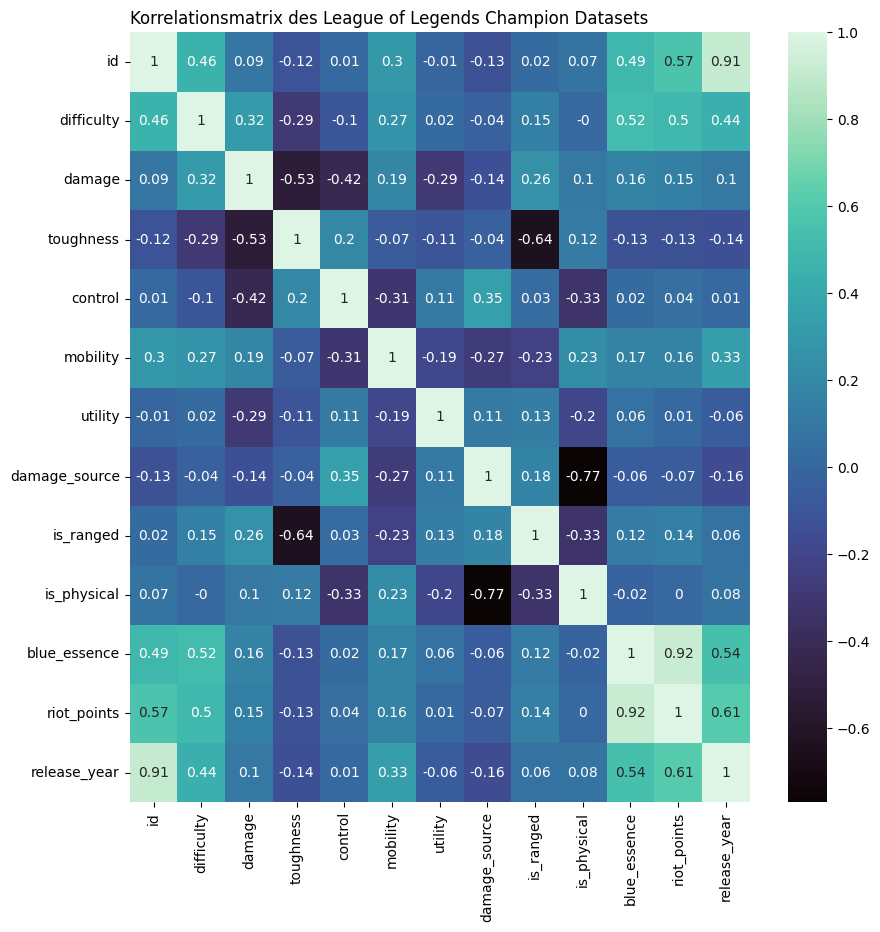

In [132]:
plt.figure(figsize=(10,10))
sns.heatmap(df_corr_spearman, annot=True, cmap='mako')
plt.title('Korrelationsmatrix des League of Legends Champion Datasets', loc='left')
plt.show()

Wir können hier bereits einige potentiell interessante Korrelationen zwischen Kategorien einsehen.
So gibt es zum Beispiel negative Korrelationen zwischen den Schadens- und Aushaltevermögensstatistiken von Charakteren, was indiziert, das Champions, die viel Schaden austeilen können eher selten auch Schaden einstecken können und vice versa.
Ebenso besteht eine positive Korrelation zwischen den Schwierigkeits- und Schadensstatistiken, während eine negative Korrelation zwischen Schwierigkeit und Aushaltevermögen besteht, was indiziert, dass Charaktere, die schwieriger zu spielen sind, eher auf offensive Schadensrollen gerichtet sind und seltener auf defensive Rollen.

Zuletzt - und für uns am interessantesten - bestehen mehrere interessante Korrelationen mit dem Erscheinungsjahr von Charakteren. So sind die meisten Statistiken anscheinend ziemich unabhängig vom Erscheinungsjahr, die Schwierigkeits- und Mobilitätswerte von Charakteren gehen jedoch generell hoch, je neuer diese Champions sind. Ebenso sind die Kosten von neuen Charakteren tendenziell höher als für ältere, was selber eine ähnlich-starke Korrelation mit dem Schwierigkeitsgrad von Champions hat.

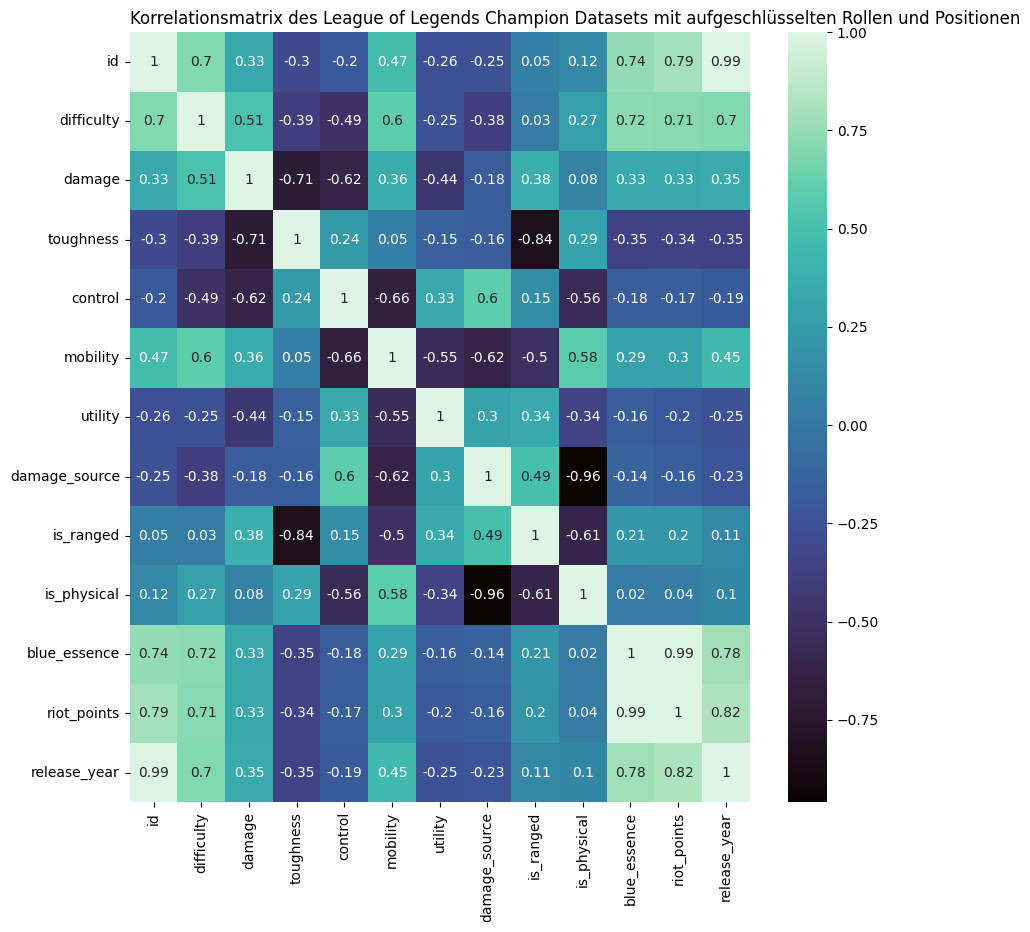

In [134]:
plt.figure(figsize=(10,10))
sns.heatmap(df_split_roleslanes_corr_spearman.corr(numeric_only=True).round(2), annot=True, cmap='mako')
plt.title('Korrelationsmatrix des League of Legends Champion Datasets mit aufgeschlüsselten Rollen und Positionen', loc='left')
plt.show()

Beim Untersuchen des zweiten DataFrames fällt auf, dass hier durchaus Unterschiede in den Korrelationen zum ersten DataFrame bestehen, hauptsächlich in dem Sinne, dass die meisten Korrelationen nun extremer ausfallen als im originalen DataFrame. Dies könnte darauf hindeuten, dass Charaktere mit mehreren Rollen oder Positionen extremere Attribute besitzen als Charaktere, welche ausschließlich für eine Rolle oder Position gedacht sind.

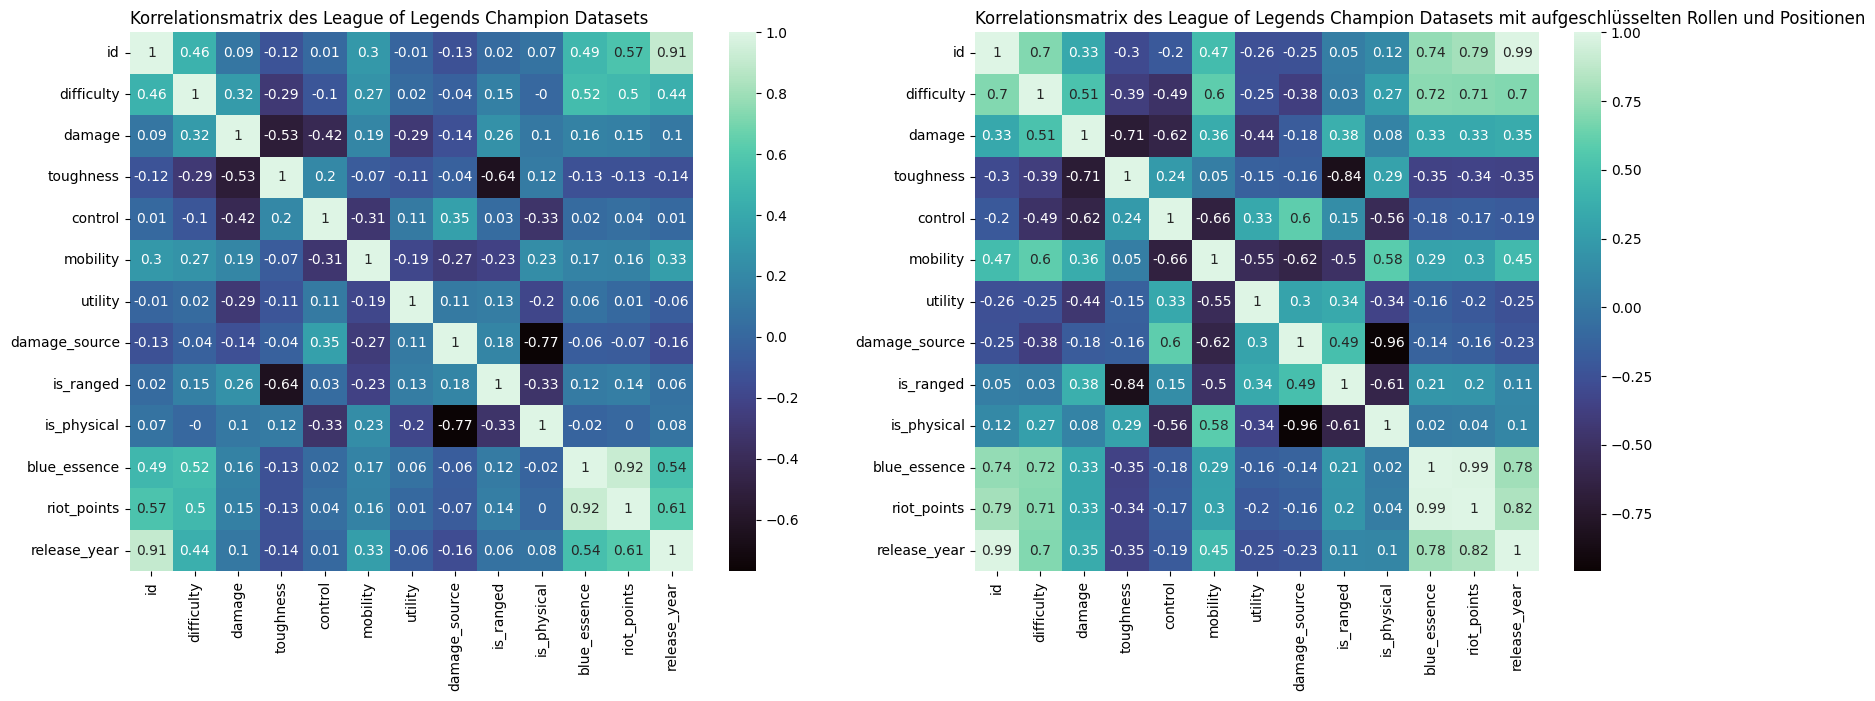

In [136]:
fig, axes = plt.subplots(1, 2, figsize=(20, 7))

corg1 = sns.heatmap(df_corr_spearman, ax =axes[0], annot=True, cmap='mako')
corg1.set_title('Korrelationsmatrix des League of Legends Champion Datasets', loc='left')

# Create a countplot for TV show ratings in the second subplot
corg2 = sns.heatmap(df_split_roleslanes_corr_spearman.corr(numeric_only=True).round(2), ax =axes[1], annot=True, cmap='mako')
corg2.set_title('Korrelationsmatrix des League of Legends Champion Datasets mit aufgeschlüsselten Rollen und Positionen', loc='left')
plt.show()

An dieser Stelle können wir uns jedoch zunächst einmal auf unsere Trendanalyse anhand des Erscheinungsjahres fokussieren.
Hierfür können wir mit der folgenden Frage anfangen:

Wie hat sich die Anzahl der jährlich erscheinenden Champions über die Jahre hinweg verändert?

In [139]:
year_champ = df[['champion_name', 'release_year']] # Extrahieren der beiden notwendigen Spalten
year_champgrp = year_champ.groupby(by='release_year').count() # Anzahl der Einträge für jedes Jahr
year_champgrp

,champion_name
release_year,
2009,42
2010,24
2011,24
2012,19
2013,8
2014,6
2015,5
2016,6
2017,5


Da das Jahr 2025 zum Zeitpunkt der Datenerhebung erst begonnen hat, werden wir dieses für unsere Trendanalyse ignorieren, da es gegebenenfalls unsere Ergebnisse verfälschen könnte.
Danach ziehen wir das Veröffentlichungsjahr aus dem Index in eine komplette, eigene Spalte, um einfacher damit arbeiten zu können.

In [141]:
year_champgrp = year_champgrp.drop(index = 2025) # Entfernt den 2025 Eintrag
year_champgrp['release_year'] = year_champgrp.index.astype(int) # Schreibt den Index in eine neue Release Year Spalte
year_champgrp.reset_index(drop=True, inplace=True) # Setzt den Index auf die Ausgangswerte zurück
year_champgrp

,champion_name,release_year
0,42,2009
1,24,2010
2,24,2011
3,19,2012
4,8,2013
5,6,2014
6,5,2015
7,6,2016
8,5,2017
9,3,2018


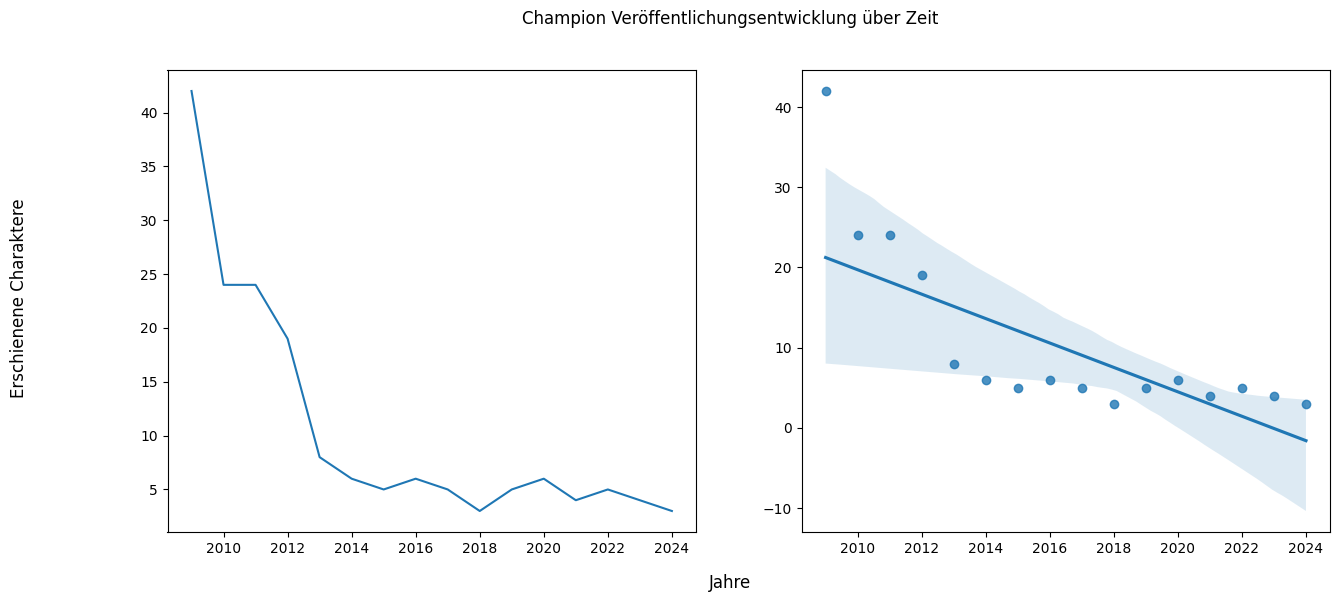

In [142]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('Champion Veröffentlichungsentwicklung über Zeit')
fig.supxlabel('Jahre')
fig.supylabel('Erschienene Charaktere')
sns.lineplot(ax =axes[0], data = year_champgrp, x = 'release_year', y = 'champion_name')
sns.regplot(ax =axes[1], data = year_champgrp, x = 'release_year', y = 'champion_name', robust = True)

axes[0].set_ylabel('')
axes[0].set_xlabel('')
axes[1].set_ylabel('')
axes[1].set_xlabel('')
plt.show()

Wie wir hiermit sehen können, ist die Anzahl der Charaktere, die jährlich herausgebracht werden, über die Zeit deutlich und konstant heruntergegangen.
Während in den Jahren 2009 bis 2012 jedes Jahr eine zweistellige Anzahl an Charakteren hinzugefügt wurden, sind in Jahren ab 2014 jedes Jahr nur höchstens 6 neue Charaktere herausgebracht worden.

Dies deutet auf einen Trend hin, bei welchem mit der Zeit immer weniger Charaktere herausgebracht werden und somit immer mehr Zeit zwischen Erscheinungen vergeht.

Als nächstes möchten wir nun einmal sehen, wie sich die durchschnittlichen Attribute, die Champions zugewiesen sind, über die Zeit entwickeln.
Hierzu zählen die Spalten 'Difficulty', 'Damage', 'Toughness', 'Control', 'Mobility' und 'Utility'.

Wie haben sich die durchschnittlichen Attributswerte von neu erschienenen Champions über die Jahre verändert?

In [146]:
atts_year = df[[ 'release_year', 'difficulty', 'damage', 'toughness', 'control', 'mobility', 'utility']] # Extrahieren der notwendigen Spalten
atts_yeargrp = atts_year.groupby(by='release_year').mean() # Durchschnittswerte jeder Spalte für jedes Jahr

Damit sind alle Attributsspalteneingaben nach ihrem Wert in der Erscheinungsjahrspalte Gruppiert und der Durchschnitt aus diesen wurde ermittelt.
Wie vorher haben wir an dieser Stelle noch den überflüssigen 2025 Eintrag und müssen das Erscheinungsjahr in eine vollständige Spalte umschreiben, um weiterarbeiten zu können.

In [148]:
atts_yeargrp = atts_yeargrp.drop(index = 2025) # Entfernt den 2025 Eintrag
atts_yeargrp['release_year'] = atts_yeargrp.index.astype(int) # Schreibt den Index in eine neue Release Year Spalte
atts_yeargrp.reset_index(drop=True, inplace=True) # Setzt den Index auf die Ausgangswerte zurück
atts_yeargrp

,difficulty,damage,toughness,control,mobility,utility,release_year
0,1.523810,2.357143,1.690476,2.000000,1.476190,1.619048,2009
1,1.625000,2.500000,1.833333,1.916667,1.583333,1.333333,2010
2,1.625000,2.458333,1.708333,2.000000,1.791667,1.291667,2011
3,1.947368,2.526316,1.473684,2.052632,1.684211,1.263158,2012
4,2.125000,2.625000,1.625000,2.250000,2.125000,1.500000,2013
5,2.500000,2.333333,1.333333,1.833333,1.833333,1.500000,2014
6,2.400000,2.400000,1.800000,2.000000,2.000000,2.000000,2015
7,2.500000,2.666667,1.333333,2.000000,1.833333,1.666667,2016
8,2.200000,2.200000,1.800000,2.400000,2.000000,1.600000,2017
9,1.666667,2.666667,1.000000,2.333333,2.333333,1.000000,2018


Wir können nun unsere ermittelten Werte in einer Graphenformation ausschreiben, um mögliche Trends in den einzelnen Spalten zu erkennen und besser zu visualisieren.

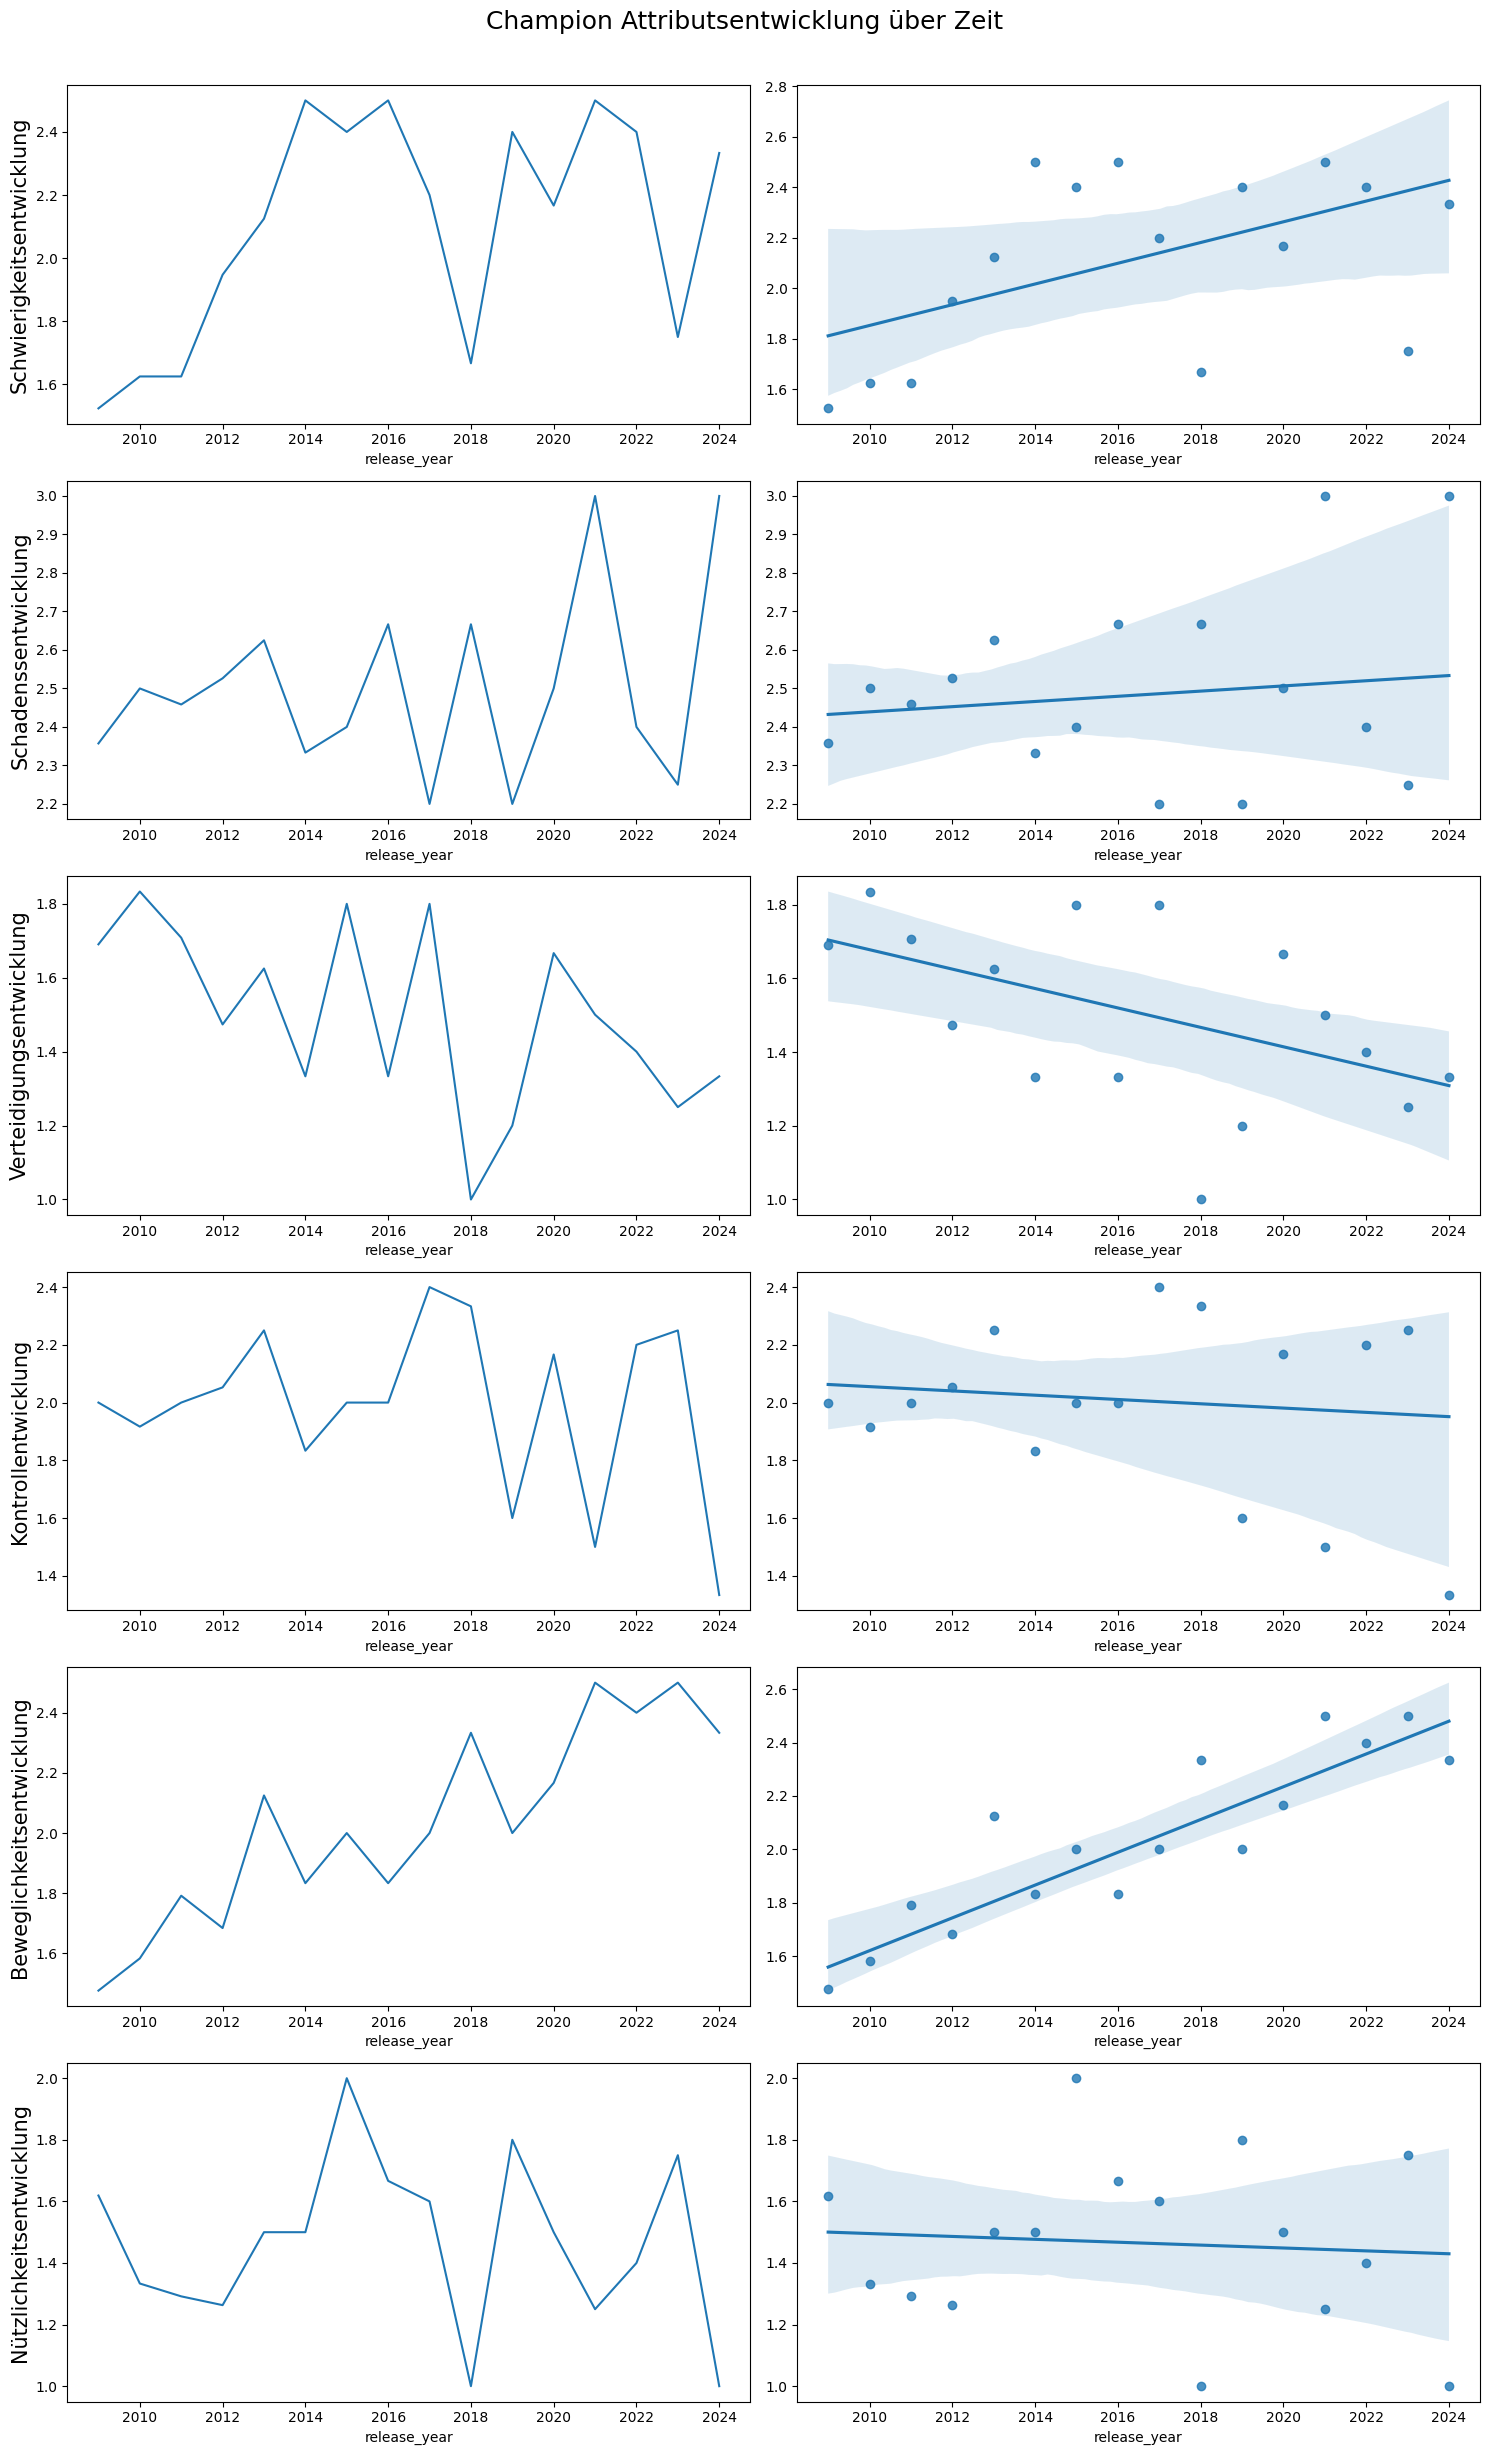

In [150]:
fig, axes = plt.subplots(6, 2, figsize=(15, 25))
fig.suptitle('Champion Attributsentwicklung über Zeit', fontsize=18)
stat1a = sns.lineplot(ax =axes[0][0], data = atts_yeargrp, x = 'release_year' , y = 'difficulty')
stat1b = sns.regplot(ax =axes[0][1], data = atts_yeargrp, x = 'release_year', y = 'difficulty', robust = True)
stat2a = sns.lineplot(ax =axes[1][0], data = atts_yeargrp, x = 'release_year', y = 'damage')
stat2b = sns.regplot(ax =axes[1][1], data = atts_yeargrp, x = 'release_year', y = 'damage', robust = True)
stat3a = sns.lineplot(ax =axes[2][0], data = atts_yeargrp, x = 'release_year', y = 'toughness')
stat3b = sns.regplot(ax =axes[2][1], data = atts_yeargrp, x = 'release_year', y = 'toughness', robust = True)
stat4a = sns.lineplot(ax =axes[3][0], data = atts_yeargrp, x = 'release_year', y = 'control')
stat4b = sns.regplot(ax =axes[3][1], data = atts_yeargrp, x = 'release_year', y = 'control', robust = True)
stat5a = sns.lineplot(ax =axes[4][0], data = atts_yeargrp, x = 'release_year', y = 'mobility')
stat5b = sns.regplot(ax =axes[4][1], data = atts_yeargrp, x = 'release_year', y = 'mobility', robust = True)
stat6a = sns.lineplot(ax =axes[5][0], data = atts_yeargrp, x = 'release_year', y = 'utility')
stat6b = sns.regplot(ax =axes[5][1], data = atts_yeargrp, x = 'release_year', y = 'utility', robust = True)



axes[0][0].set_ylabel('Schwierigkeitsentwicklung', fontsize=15)
axes[0][1].set_ylabel('')
axes[1][0].set_ylabel('Schadenssentwicklung', fontsize=15)
axes[1][1].set_ylabel('')
axes[2][0].set_ylabel('Verteidigungsentwicklung', fontsize=15)
axes[2][1].set_ylabel('')
axes[3][0].set_ylabel('Kontrollentwicklung', fontsize=15)
axes[3][1].set_ylabel('')
axes[4][0].set_ylabel('Beweglichkeitsentwicklung', fontsize=15)
axes[4][1].set_ylabel('')
axes[5][0].set_ylabel('Nützlichkeitsentwicklung', fontsize=15)
axes[5][1].set_ylabel('')

fig.tight_layout()
fig.subplots_adjust(top=0.95)
#sns.regplot(ax =axes[1], data = year_champgrp, x = 'release_year', y = 'champion_name', robust = True)
plt.show()

Jetzt, wo wir die Attribute auf diese Art aufgezeichnet haben, können wir die folgenden Oberservationen machen:
- Die durchschnittlichen Werte für die Kontroll-, Schadens- und Nützlichkeitswerte von Charakteren haben keine offensichtliche Korrelation mit dem Jahr, in dem diese herausgekommen sind.
- Eine schwache negative Korrelation existiert für die Verteidigungswerte von Champions je nachdem, wann diese herausgekommen sind.
- Es existieren relevante positive Korrelationen von den Schwierigkeits- und Beweglichkeitswerten von Champions mit dem Erscheinungsdatum dieser.


Daraus lässt sich ableiten, dass Charaktere im Durchschnitt im Laufe der Zeit beweglicher und schwieriger zu spielen geworden sind und etwas weniger Defensiv orientiert sind.

Interessant ist an dieser Stelle, welche anderen Aspekte sich sonst noch auf diese 6 Attribute auswirken können. Wir möchten uns also diese ebenso einmal zusammen angucken.

Wie beinflussen die 6 Attribute, die Charaktere besitzen, sich untereinander?

In [154]:
attributes = df[['difficulty', 'damage', 'toughness', 'control', 'mobility', 'utility']]
attributes

,difficulty,damage,toughness,control,mobility,utility
0,2,3,3,2,2,2
1,2,3,1,2,3,1
2,2,3,1,1,3,1
3,3,3,1,1,3,2
4,1,1,3,3,1,2
...,...,...,...,...,...,...
167,2,2,1,2,3,0
168,2,3,1,2,2,1
169,2,2,1,2,2,3
170,3,3,1,2,2,1


In [155]:
attributes_corr = attributes.corr(method = 'spearman', numeric_only=True).round(2) 
attributes_corr

,difficulty,damage,toughness,control,mobility,utility
difficulty,1.00,0.32,-0.29,-0.10,0.27,0.02
damage,0.32,1.00,-0.53,-0.42,0.19,-0.29
toughness,-0.29,-0.53,1.00,0.20,-0.07,-0.11
control,-0.10,-0.42,0.20,1.00,-0.31,0.11
mobility,0.27,0.19,-0.07,-0.31,1.00,-0.19
utility,0.02,-0.29,-0.11,0.11,-0.19,1.00


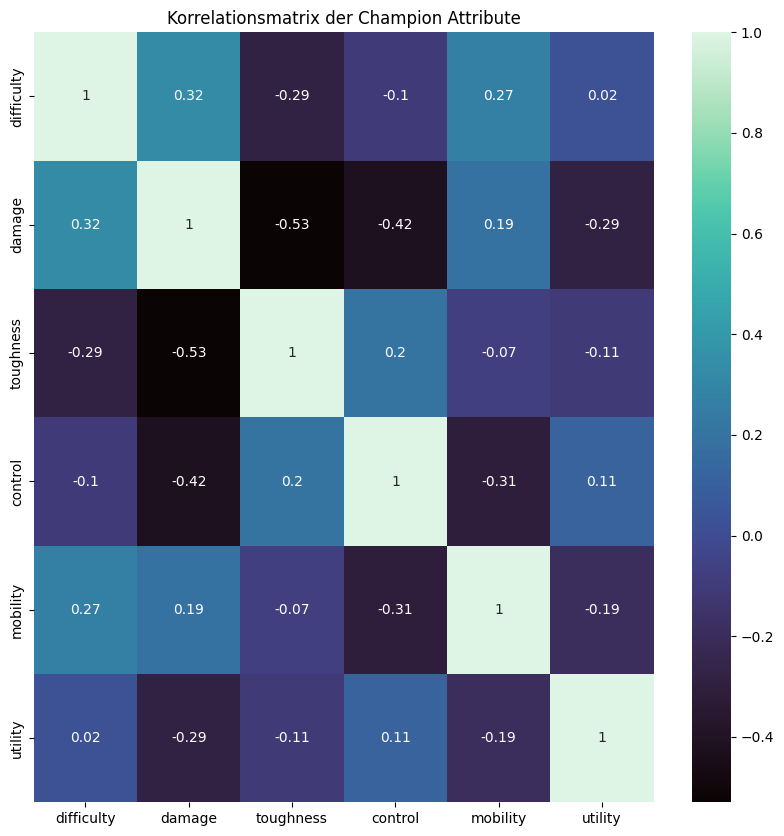

In [156]:
plt.figure(figsize=(10,10))
sns.heatmap(attributes_corr, annot=True, cmap='mako')
plt.title('Korrelationsmatrix der Champion Attribute', loc='center')
plt.show()

Wir können hier einige Korrelationen zwischen Attributen sehen.
Die stärkste Korrelation in unseren Werten ist die negative Korrelation zwischen Schadens- und Verteidigungswerten.
Dies indiziert, dass Charaktere, die mehr Schaden verursachen, in der Regel eher weniger aushalten können sowie anders herum.
Ebenso haben Schadens-fokussierte Charaktere eher selten Kontroll-Fähigkeiten, um Gegner vorübergehend zu behindern oder außer Gefecht zu setzen.
Gleichzeitig jedoch hat Schaden von allen Metriken die stärkste positive Korrelation mit der Schwierigkeit eines Charakteres, was indiziert, dass Schadensorientierte Champions im Durchschnitt schwieriger zu spielen sind als Charaktere mit anderen Fokuspunkten.

Auf der anderen Seite können wir durch die Negative Korrelation zwischen Schwierigkeit und Aushaltevermögen - der einzigen nennenswerten negativen Korrelation des Schwierigkeitswertes - sehen, dass Charaktere mit einem höheren Fokus auf Verteidigung im Durchschnitt als einfacher zu spielen eingeschätzt werden.

Das letzte Attribut in unserem Datensatz, welches eine nennenswerte Korrelation mit der Schwierigkeit eines Charakters aufweist, ist der Mobilitätswert. Dies indiziert, dass mobiliere Champions tendenziell schwieriger zu spielen sind.

Weiter lassen sich negative Korrelationen zwischen Mobilität und Kontrollfähigkeit sowie zwischen Schaden und dem Wert des Nützlichkeitsfaktors eines Champions erkennen.


Abschließend lässt sich hierbei folgendes erkennen:
Champions, die schwieriger zu spielen sind, sind im Durchschnitt offensiver ausgerichtet und mobiler als Charaktere, die als einfacher eingestuft sind. Dies lässt sich damit erklären, dass schwierigere Champions oft darauf ausgelegt sind, Schaden und negativen Effekten mithilfe von erhöhter Mobilität auszuweichen, wodurch sie dann ebenso niedrigere Verteidigungswerte haben. Ebenso haben diese Champions öfters konditionelle Möglichkeiten, mehr Schaden als normal auszuteilen, welcher jedoch davon abhängig ist, dass sie durch ihre erhöhte Mobilität zur richtigen Zeit am richtigen Ort sein können.

Ebenso haben schadensorientierte Charaktere im Durchschnitt merkbar weniger Aushaltevermögen und Zugang zu kontollierenden Fähigkeiten, was sich dadurch erklären lässt, dass diese drei Aspekte die Mittelpunkte von unterschiedlichen Charakterklassen sind und Charaktere daher selten alle drei Attribute in nennenswerten Quantitäten erhalten.

Weiter können wir nun auch untersuchen, wie sich die Rollen im Laufe der Jahre aufteilen. Hierfür müssen wir dann unser zweites DataFrame hinzuziehen, da dies die relevanten, aufgeschlüsselten Informationen hierzu enthält.

Wie hat sich die Rollenverteilung von neu erschienenen Champions über die Jahre verändert?

In [160]:
year_role = df_split_roleslanes[['release_year', 'role']]
year_role = year_role.drop(year_role[year_role['release_year'] == 2025].index) # Entfernt den 2025 Eintrag
year_role

,release_year,role
0,2013,Juggernaut
1,2011,Burst
2,2010,Assassin
3,2010,Assassin
4,2021,Assassin
...,...,...
214,2022,Marksman
215,2012,Artillery
216,2009,Specialist
217,2017,Burst


In [161]:
year_rolegrp = year_role.groupby(['release_year', 'role']).value_counts().reset_index()
year_rolegrp

,release_year,role,count
0,2009,Assassin,4
1,2009,Battlemage,3
2,2009,Burst,4
3,2009,Catcher,2
4,2009,Diver,1
...,...,...,...
99,2024,Assassin,2
100,2024,Burst,2
101,2024,Diver,1
102,2024,Marksman,1


Wir haben hier nun die Rollen, die in jedem Jahr herausgekommen sind, nach dem Erscheinungsjahr sortiert und untereinander zusammengezäht. Wir können diese Werte nun in Graphen zusammenfassen und schauen, wie sich diese über die Jahre verteilen.

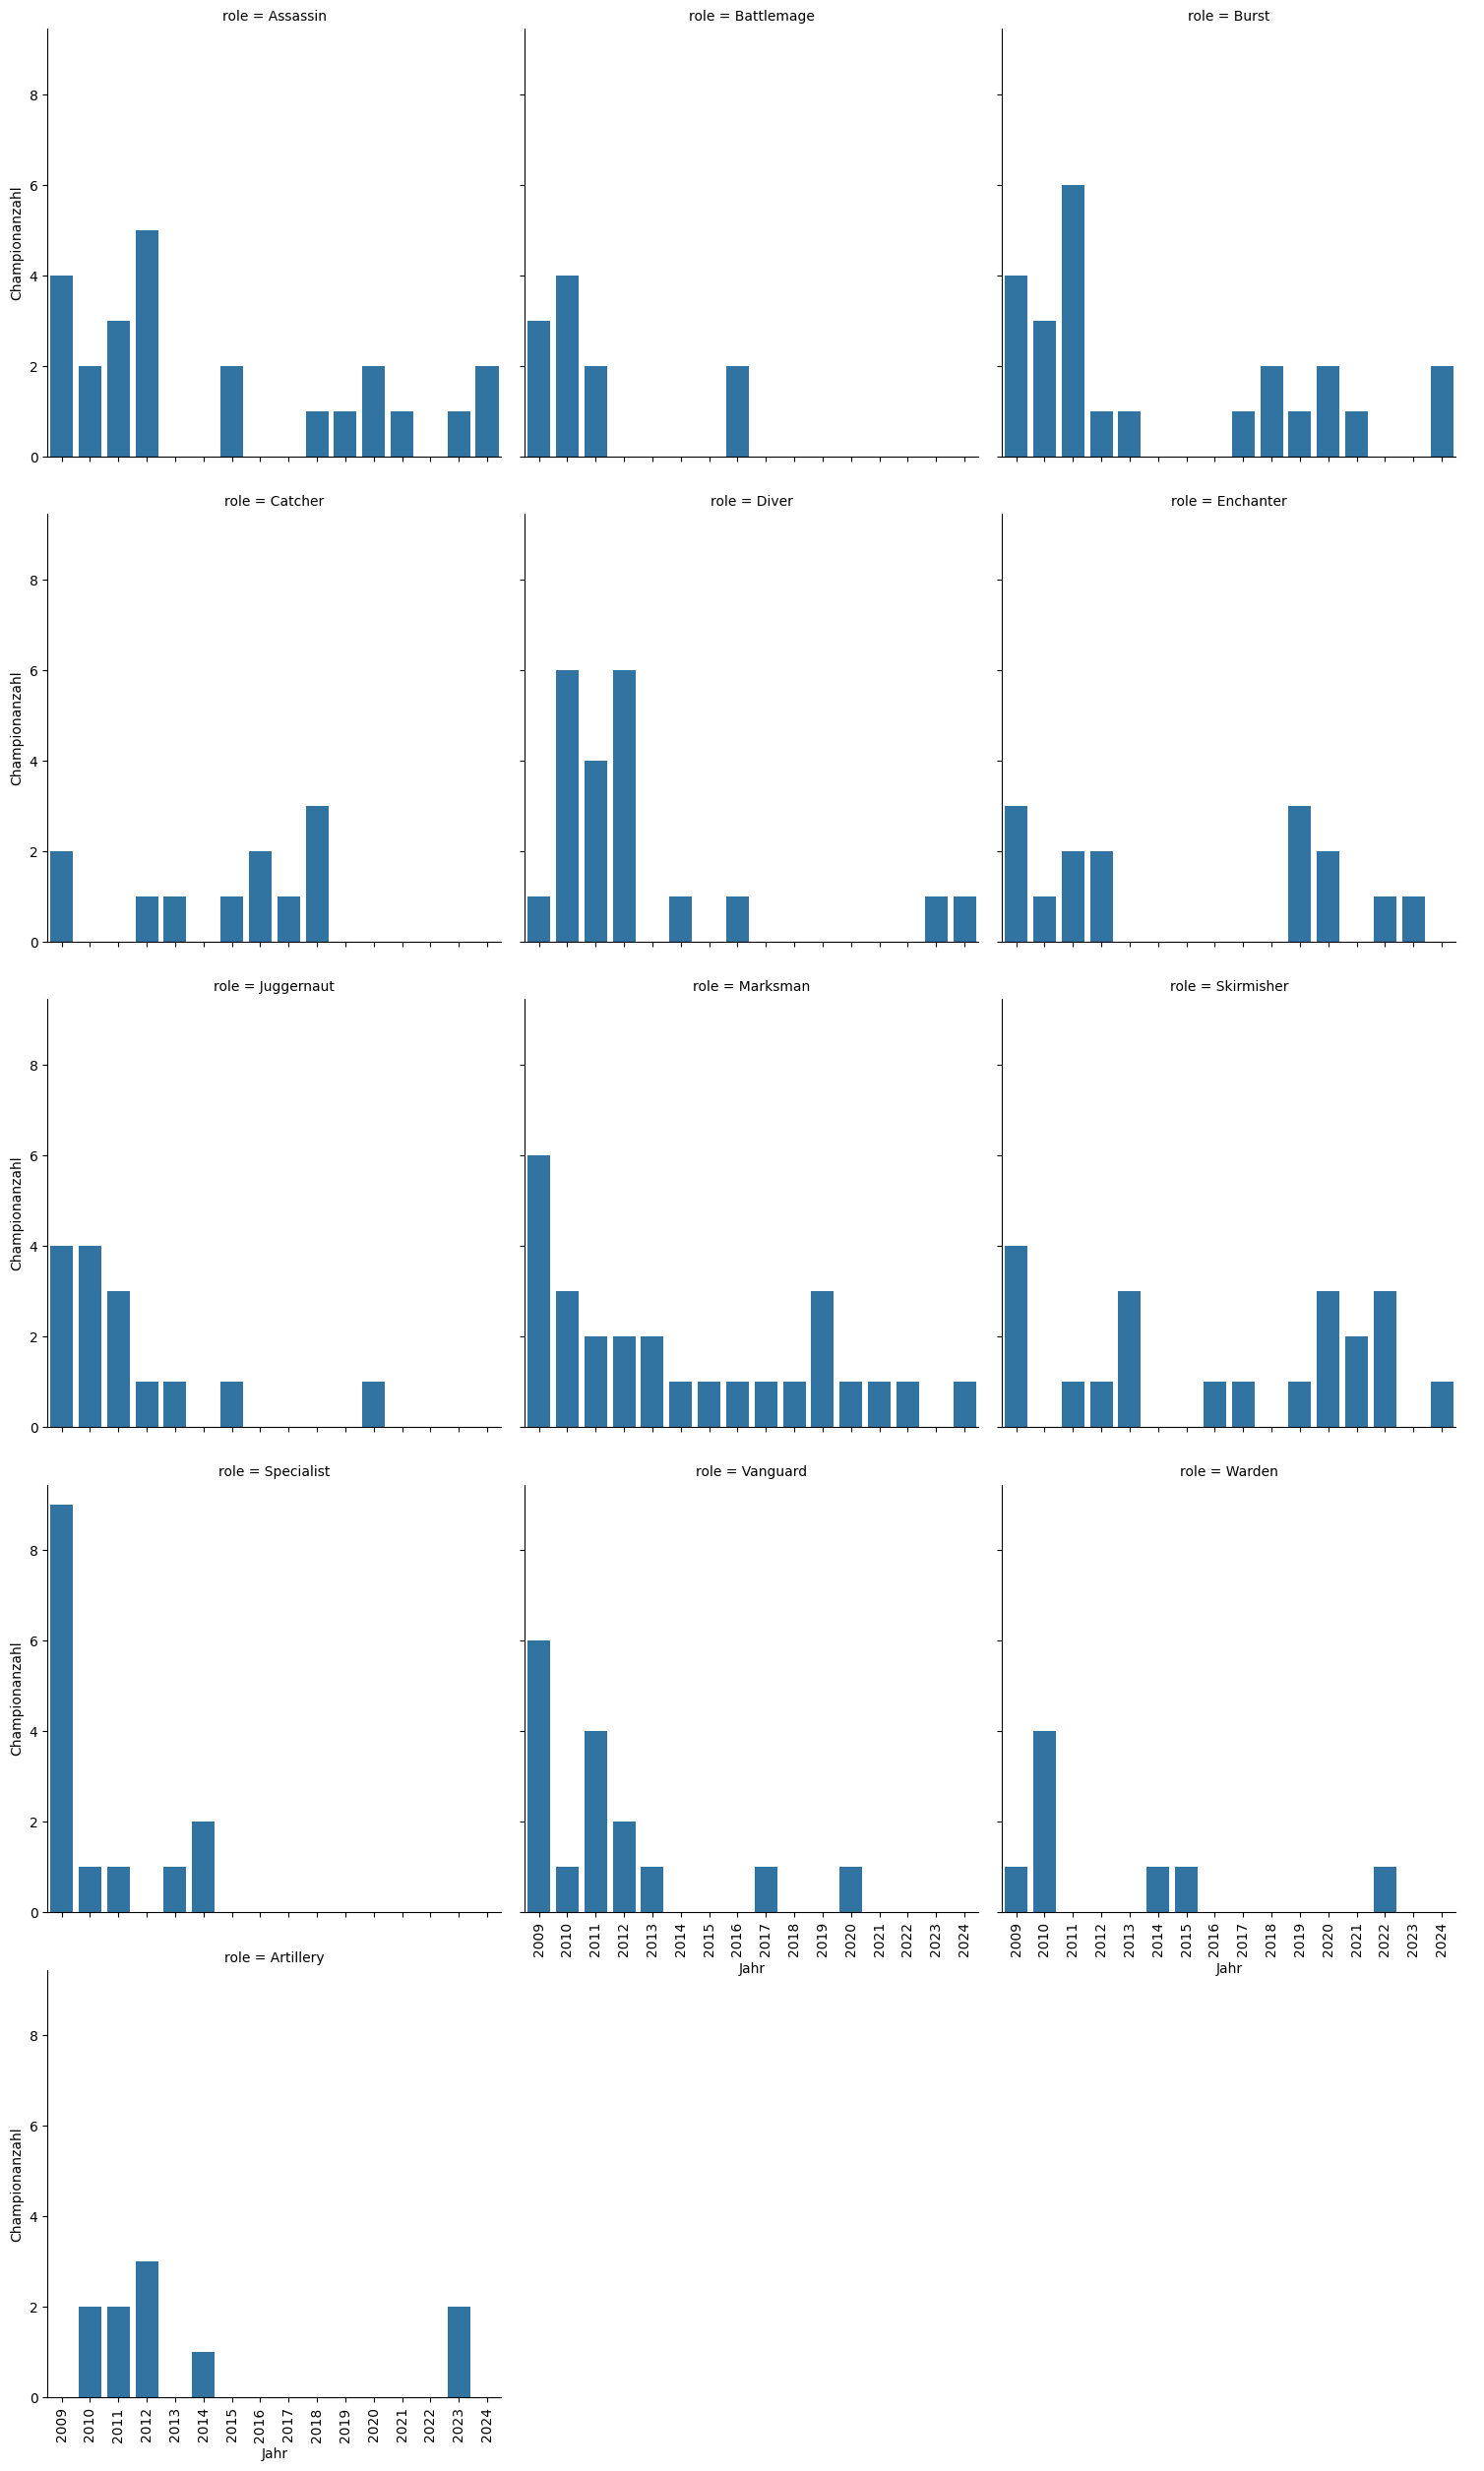

In [163]:
roleplot = sns.catplot(
    data=year_rolegrp,
    x='release_year',
    y='count',
    col='role',
    kind='bar',
    col_wrap=3
).set_axis_labels('Jahr', 'Championanzahl')
roleplot.set_xticklabels( 
    labels=year_rolegrp['release_year'].unique(), rotation=90)
plt.show()

Mithilfe dieser Graphen können wir einige nennenswerte Observationen machen.

So gibt es zum Beispiel eine extrem hohe Anzahl an Champions, die im Jahr 2009 herauskamen und in die Specialist Rolle fallen, danach gab es jedoch seit 2014 keinen einzigen Eintrag in dieser Rolle mehr.

Ebenso gibt es mehrere Rollen, welche größere Lücken in den Jahren zwischen herauskommenden Champions aufweisen. So gibt es bei der Artillery Rolle eine 8-Jährige Lücke, in welcher kein weiterer Champion herauskam, die Catcher und Battlemage Rollen haben beide seit über 5 Jähren keinen neuen Eintrag erhalten und die Juggernaut Rolle hat seit 2016 lediglich einen einzigen weiteren Charakter erhalten.

Auf der Gegenseite jedoch lassen sich auch einige Rollen erkennen, welche mit verhältnismäßig verlässlicher Regularität neue Charaktere erhalten. So gibt es zum Beispiel nur zwei Jahre, in welchen kein einziger neuer Marksman Champion herausgebracht wurde. Ebenso sind im Großteil der Jahre neue Charaktere in den Rollen Skirmisher, Assassin und Burst(mage) erschienen.

Komplementär können wir an dieser Stelle dasselbe mit den Positionsinformationen durchführen, um hier ebenso einmal zu sehen, wie sich die Verteilung dieser über die Jahre verändert hat.

Wie hat sich die Positionsverteilung von neu erschienenen Champions über die Jahre verändert?

In [167]:
year_lane = df_split_roleslanes[['release_year', 'lane']]
year_lane = year_lane.drop(year_lane[year_lane['release_year'] == 2025].index) # Entfernt den 2025 Eintrag
year_lane

,release_year,lane
0,2013,Top
1,2011,Middle
2,2010,Middle
3,2010,Top
4,2021,Middle
...,...,...
214,2022,Bottom
215,2012,Bottom
216,2009,Support
217,2017,Middle


In [168]:
year_lanegrp = year_lane.groupby(['release_year', 'lane']).value_counts().reset_index()
year_lanegrp

,release_year,lane,count
0,2009,Bottom,5
1,2009,Jungle,12
2,2009,Middle,8
3,2009,Support,10
4,2009,Top,12
...,...,...,...
62,2023,Middle,2
63,2023,Support,2
64,2024,Bottom,1
65,2024,Middle,2


Wir haben hier nun die Positionen, die Charaktererscheinungen in jedem Jahr abgedeckt haben, nach dem Erscheinungsjahr sortiert und untereinander zusammengezäht. Wir können diese Werte nun wie vorher bei den Rollen in Graphen zusammenfassen und schauen, wie sich diese über die Jahre verteilen.

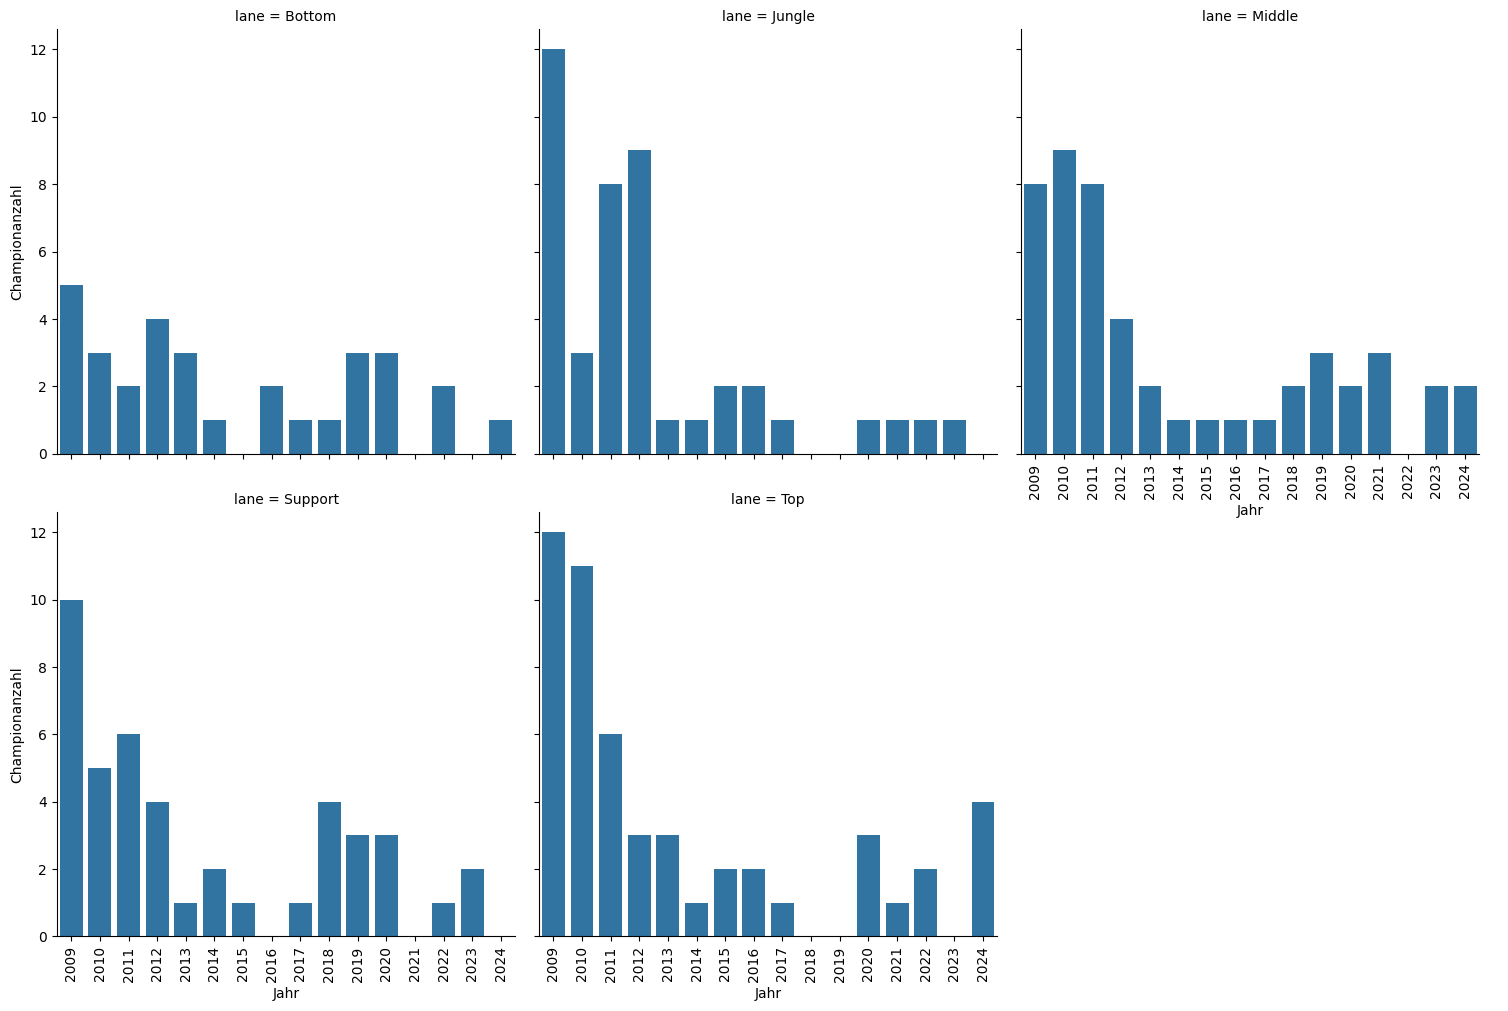

In [170]:
laneplot = sns.catplot(
    data=year_lanegrp,
    x='release_year',
    y='count',
    col='lane',
    kind='bar',
    col_wrap=3
).set_axis_labels('Jahr', 'Championanzahl')
laneplot.set_xticklabels( 
    labels=year_lanegrp['release_year'].unique(), rotation=90)
plt.show()

Auch hier gibt es ein paar nennenswerte Observationen:

Während die meisten Positionen innerhalb der ersten paar Jahre eine im Vergleich zu den Folgejahren hohe Anzahl an Charakteren erhalten haben, gibt es nur eine verhältnismäßig niedrige Anzahl an Champions in diesen ersten Jahren, welche für die Botlane bestimmt waren.

Ebenso wurden seit 2017 lediglich 4 neue Champions herausgebracht, welche für den Jungle gedacht sind, deutlich weniger als für jede andere Rolle.

Gesamt fällt auf, dass in den letzten 5 Jahren unseres Datensatzes ein überdimensionierter Anteil an den erschienenen Charakteren für die Mid- sowie die Top-Lane herausgebracht wurde, während verhältnismäßig wenige neue Champions für die Bottom-Lane sowie den Jungle heauskamen.

Zuletzt fällt noch auf, dass nur ein einziges Jahr - 2022 - im gesamten Spiel vergangen ist, in welchem kein neuer Charakter für die Mid-Lane herausgebracht wurden.

Zu guter letzt können wir uns jetzt noch einmal den derzeitigen Stand der Erwerbskosten der Champions über die Jahre ansehen.
Hierzu ist anzumerken, dass die Kosten von Champions für lange Zeiten konstant waren, innerhalb der letzten paar Jahre jedoch zweimal grundlegend und flächendeckend angepasst wurden, was für mögliche Erkenntnisse berücksichtigt werden muss.

Wie habe sich die Kosten von neu erschienenen Champions über die Jahre verändert?

In [174]:
year_berp = df[['release_year', 'blue_essence','riot_points']] # Extrahieren der  notwendigen Spalten
year_berp = year_berp.drop(year_berp[year_berp['release_year'] == 2025].index) # Entfernt den 2025 Eintrag
year_berpgrp = year_berp.groupby(by='release_year').mean() # Anzahl der Einträge für jedes Jahr
year_berpgrp

,blue_essence,riot_points
release_year,,
2009,935.714286,525.476190
2010,1281.250000,660.416667
2011,1531.250000,719.583333
2012,1744.736842,736.842105
2013,1762.500000,783.750000
2014,2124.166667,865.000000
2015,2070.000000,844.000000
2016,2370.333333,880.000000
2017,2235.000000,862.000000


In [175]:
year_berpgrp['release_year'] = year_berpgrp.index.astype(int) # Schreibt den Index in eine neue Release Year Spalte
year_berpgrp.reset_index(drop=True, inplace=True) # Setzt den Index auf die Ausgangswerte zurück
year_berpgrp

,blue_essence,riot_points,release_year
0,935.714286,525.476190,2009
1,1281.250000,660.416667,2010
2,1531.250000,719.583333,2011
3,1744.736842,736.842105,2012
4,1762.500000,783.750000,2013
5,2124.166667,865.000000,2014
6,2070.000000,844.000000,2015
7,2370.333333,880.000000,2016
8,2235.000000,862.000000,2017
9,1550.000000,751.666667,2018


Wir haben nun die durchschnittlichen Blue Essence sowie Riot Point Preise aller Charaktere, Gruppiert auf die Jahre in denen diese herausgekommen sind.
Diese können wir nun in Graphen auslegen, um Trends hierbei zu suchen und zu visualisieren.

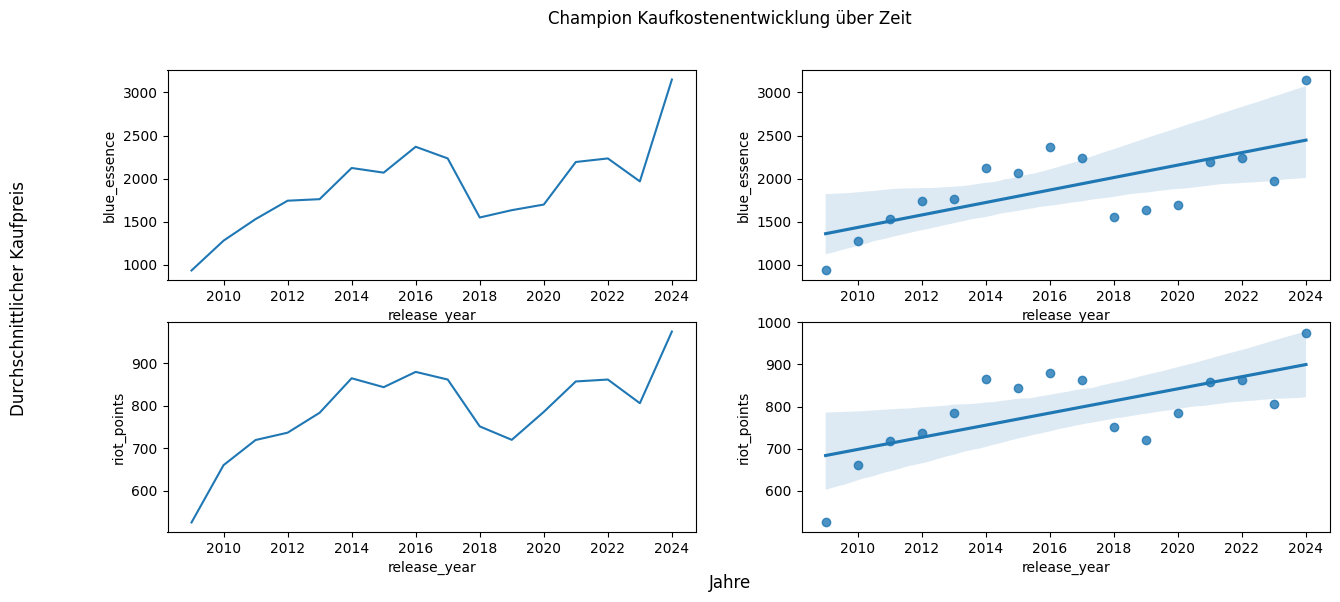

In [177]:
fig, axes = plt.subplots(2, 2, figsize=(15, 6))
fig.suptitle('Champion Kaufkostenentwicklung über Zeit')
fig.supxlabel('Jahre')
fig.supylabel('Durchschnittlicher Kaufpreis')
sns.lineplot(ax =axes[0][0], data = year_berpgrp, x = 'release_year', y = 'blue_essence')
sns.regplot(ax =axes[0][1], data = year_berpgrp, x = 'release_year', y = 'blue_essence', robust = True)
sns.lineplot(ax =axes[1][0], data = year_berpgrp, x = 'release_year', y = 'riot_points')
sns.regplot(ax =axes[1][1], data = year_berpgrp, x = 'release_year', y = 'riot_points', robust = True)
plt.show()

Wir können hier erkennen, dass es durchaus eine positive Korrelation zwischen dem Erscheinungsdatum eines Champions und den Kaufpreisen dessen in beiden vorhandenen Währungen besteht.
Dies sagt uns, dass neuere Champions durchschnittlich mehr kosten, um freigeschaltet zu werden als ältere Charaktere.

Abschließend können wir im Laufe unserer Analyse nun also einige zeitliche Trends und Zusammenhänge zwischen Charakteristiken von Champions in unserem Datensatz sehen und benennen.

So können wir sehen, dass im Laufe der Jahre pro Jahr im Durchschnitt eine immer geringere Anzahl an neuen Charakteren dem Spiel hinzugefügt werden, welche im Durchschnitt weniger Schaden aushalten und schwieriger zu spielen sind, dafür dann aber auch immer mobiler werden.

Auch können wir sehen, dass diese neuen Champions im Durchschnitt zum derzeitigen Zeitpunkt teurer zu erwerben sind als ältere Champions im Spiel.

Weiter können wir sehen, dass diese neuen Charaktere sich eher auf schadensorientierte Klassen wie die Assassinen, Skirmisher und Schützen verteilen, was definitiv eine mögliche Erklärung für die Trends in den Verteidigungs-, Mobilitäts- und Schwierigkeitswerten sein könnte, da diese drei Rollen allesamt den Ruf haben, in mindestens zwei dieser drei Kategorien sehr hohe Werte aufzuweisen.

Ferner gibt es ein paar potentiell interessante Trends darin zu sehen, für welche Positionen Champions herausgebracht wurden.
So wurden zum Beispiel in den letzten 5 Jahren überdurchschnittlich viele Charaktere für die Mid- und Top-Lane herausgebracht, während verhältnismäßig wenige Charaktere für den Jungle herauskamen.
Dies deckt sich teilweise mit der Observation, welche Charakter-Klassen während der letzten Jahre herauskamen, da Assassinen meistens für die Mid-Lane gedacht sind, während Skirmisher-Champions meistens für die Top-Lane gedacht sind.

Als letztes können wir noch erkennen, dass es einige Charakterattribute gibt, welche tendenziell zusammenzuhängen scheinen.

Champions, die schwieriger zu spielen sind, sind im Durchschnitt offensiver ausgerichtet und mobiler als Charaktere, die als einfacher eingestuft sind. Dies lässt sich damit erklären, dass schwierigere Champions oft darauf ausgelegt sind, Schaden und negativen Effekten mithilfe von erhöhter Mobilität auszuweichen, wodurch sie dann ebenso niedrigere Verteidigungswerte haben. Ebenso haben diese Champions öfters konditionelle Möglichkeiten, mehr Schaden als normal auszuteilen, welcher jedoch davon abhängig ist, dass sie durch ihre erhöhte Mobilität zur richtigen Zeit am richtigen Ort sein können.

Ebenso haben schadensorientierte Charaktere im Durchschnitt merkbar weniger Aushaltevermögen und Zugang zu kontollierenden Fähigkeiten, was sich dadurch erklären lässt, dass diese drei Aspekte die Mittelpunkte von unterschiedlichen Charakterklassen sind und Charaktere daher selten alle drei Attribute in nennenswerten Quantitäten erhalten.